<h1 style="text-align: center;"> <b>Global Prevalence and Burden of Mental Health Disorders </b></h1>

<h2 style="text-align: center;"> Exploratory Data Analysis (EDA) Report </h2>

<h5 style="text-align: center;"> Luna Pérez Troncoso </h5>     

<br/><br/>

#### **Introduction**

**Mental health plays a fundamental role in the overall well-being of individuals and the stability of societies**. It shapes how people think, feel, and act, influencing their relationships, productivity, and quality of life. When mental health deteriorates, **the consequences extend beyond the individual, affecting families, workplaces, and communities at large**.

Across the globe, mental health disorders represent a **growing public health concern**. Hundreds of millions of people experience conditions such as anxiety and depression every year, and these numbers continue to rise. It is estimated that nearly **one in three women and one in five men will experience a major depressive episode at some point in their lives**. Although disorders like schizophrenia or bipolar disorder are less frequent, their social and economic impact remains profound.

**This exploratory data analysis (EDA) aims to investigate the global prevalence and burden of mental health disorders** across countries, continents, and socioeconomic regions.By identifying global trends and potential contributing factors, **this analysis seeks to provide a clearer understanding of how mental health challenges manifest across different populations and what patterns may inform prevention and intervention strategies**.

<br/><br/>

<h2 style="text-align: center;"> <b> PART 1</b>: Static graphs and hypothesis contrast </h2> 

<br/><br/>

#### **Preparation, data collection and data loading**

In this jupyter notebook we are going to use Numpy and Pandas libraries in orden to load, clean, clasify and operate with data. Matplotlib and Seaborn libraries are requiered for graphical representation. Contrast hypothesis was carried out using SciPy.stats functions. 


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option("display.max_rows", 500)

In this EDA we are going to explore global mental health disorders prevalence and burden data, from a [kaggle dataset](https://www.kaggle.com/datasets/imtkaggleteam/mental-health) shared by Mohamadreza Momeni in CSV format. This data was collected through [OurWorldInData](https://ourworldindata.org/) platform from two main sources: [Global Burden of Disease study](https://ghdx.healthdata.org/) by Institute for Health Metrics and Evaluation (GBD-IHME) from the University of Washington and [World Health Organization (WHO)](https://www.who.int/).


In [3]:
df_mh=pd.read_csv("./data/mental_health/1- mental-illnesses-prevalence.csv")
df_mh_burden=pd.read_csv("./data/mental_health/2- burden-disease-from-each-mental-illness(1).csv")

#### **Data exploration**

The both datasets are composed by **two text columns**. The first one identify the **entities** (country, continent, geographic region or grouped countries data classified by income level), whereas the second one refers to the **year**. Each entity and year has information of the **prevalence and** the **burden** of five relevant **mental health disorders**: **anxiety** disorders, **bipolar** disorders, **depressive** disorders, **eating** disorders and **schizophrenia** spectrum disorders.   
  
  
Both prevalence and burden data are age-standardized and comes from both mixed sex. **Prevalence** data is **expressed in percentages** of prevalence, whereas **burden** is **measured by Disability-Adjusted Life Years (DALYs) rate per 100.000 Population**. Disability-adjusted life years (DALYs) represent the sum of years lost to premature death and years lived with disability.

<p align="center">
  <img src="https://nccid.ca/wp-content/uploads/sites/2/2015/03/gbd1.png"/>
</p>



In [4]:
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

In [5]:
df_mh_burden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 8 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          6840 non-null   object 
 1   Code                                                                            6150 non-null   object 
 2   Year                                                                            6840 non-null   int64  
 3   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  6840 non-null   float64
 4   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia         6840 non-null   float64
 5   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder      6840 non-null   float64
 6   DALYs (rate) - Se

In [6]:
df_mh.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  
0                                           0.127700                           
1                                           0.123256                           
2                                           0.118844                           
3                                           0.115089                           
4                                           0.111815

In [7]:
df_mh_burden.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Depressive disorders  \
0                                          895.22565                                
1                                          893.88434                                
2                                          892.34973                                
3                                          891.51587                                
4                                          891.39160                                

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Schizophrenia  \
0                                          138.24825                         
1                                          137.76122                         
2                                          137.08030                         
3                                          136.48602                         
4                                          136.18323                         

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Bipolar disorder  \
0                                          147.64412                            
1                                          147.56696                            
2                                          147.13086                            
3                                          146.78812                            
4                                          146.58481                            

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Eating disorders  \
0                                          26.471115                            
1                                          25.548681                            
2                                          24.637949                            
3                                          23.863169                            
4                                          23.189074                            

   DALYs (rate) - Sex: Both - Age: Age-standardized - Cause: Anxiety disorders  
0                                          440.33000                            
1                                          439.47202                            
2                                          437.60718                            
3                                          436.69104                            
4                                          436.76800

As we can see, in the **entities** columns we can find mixed data of the **countries**, **continent**, **geographic region** based on [The World Bank (WB)](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html) or [World Health Organization (WHO)](https://ourworldindata.org/grapher/who-regions) and the economic **classification** of the countries **by level of income** established by [WB](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html), then **data cleaning is needed**. Both datasets cover the time period between 1990 and 2019.

In [8]:
print("List of entities included in prevalence dataset : \n",df_mh.Entity.unique(),"\n\n")

List of entities included in prevalence dataset : 
 ['Afghanistan' 'Africa (IHME GBD)' 'Albania' 'Algeria'
 'America (IHME GBD)' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Asia (IHME GBD)' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Europe (IHME GBD)' 'European Union (27)' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Greenlan

In [9]:
print("List of entities included in burden dataset : \n",df_mh_burden.Entity.unique(),"\n\n")

List of entities included in burden dataset : 
 ['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'East Timor' 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe & Central Asia (WB)'
 'European Region (WHO)' 'Fiji' 'Finland' 'France' 'G20' 'Gabon' 'Gamb

In [10]:
print("Time period covered prevalence dataset : \n",df_mh.Year.min(),df_mh.Year.max())
print("Time period covered burden dataset : \n",df_mh_burden.Year.min(),df_mh_burden.Year.max())

Time period covered prevalence dataset : 
 1990 2019
Time period covered burden dataset : 
 1990 2019


#### **Data cleaning**

As we have mentioned before **entities contains mixed type of data**. Consequently, **datasets were divided into different Pandas' dataframes**: countries, continents, geographic regions by WHO, geographic regions by WB and income level groups. Moreover, some **unpaired entities** like *Euro OECD Countries* and *European Union data*, included in other entities, **were dropped**. Prevalence and burden columns long indexes of the different mental health disorders were renamed to simplify indexing, slicing and masking. Aditionally, the redundant *code* column was discarted in this part of the EDA.

In [11]:
df_mh.drop("Code",axis=1,inplace=True)
df_mh.columns=["country","year","Schizophrenia","Depressive","Anxiety","Bipolar","Eating"]

In [12]:
df_mh_income = df_mh[(df_mh.country =='Low-income countries')|(df_mh.country =='Lower-middle-income countries')|(df_mh.country =='Upper-middle-income countries')|(df_mh.country =='High-income countries')]
df_mh.drop(df_mh.index[(df_mh.country =='Low-income countries')|(df_mh.country =='Lower-middle-income countries')|(df_mh.country =='Upper-middle-income countries')|(df_mh.country =='High-income countries')],axis=0,inplace=True)

df_mh_world=df_mh[df_mh.country =="World"]
df_mh.drop(df_mh.index[(df_mh.country =='European Union (27)')|(df_mh.country =="World")],inplace=True)

df_mh_cont = df_mh[(df_mh.country =="Asia (IHME GBD)")|(df_mh.country =='Europe (IHME GBD)')|(df_mh.country =='America (IHME GBD)')|(df_mh.country =='Africa (IHME GBD)')]
df_mh.drop(df_mh.index[(df_mh.country =="Asia (IHME GBD)")|(df_mh.country =='Europe (IHME GBD)')|(df_mh.country =='America (IHME GBD)')|(df_mh.country =='Africa (IHME GBD)')],axis=0,inplace=True)

In [13]:
df_mh_burden.drop("Code",axis=1,inplace=True)
df_mh_burden.columns=["country","year","Schizophrenia","Depressive","Anxiety","Bipolar","Eating"]

In [14]:
df_mh_burden_income = df_mh_burden[(df_mh_burden.country == 'Low income (WB)')|(df_mh_burden.country == "Lower middle income (WB)")|(df_mh_burden.country =='Middle income (WB)')|(df_mh_burden.country =='High income (WB)')]
df_mh_burden.drop(df_mh_burden.index[(df_mh_burden.country == 'Low income (WB)')|(df_mh_burden.country == "Lower middle income (WB)")|(df_mh_burden.country =='Middle income (WB)')|(df_mh_burden.country =='High income (WB)')],axis=0,inplace=True)

df_mh_burden_WB = df_mh_burden[(df_mh_burden.country =='Europe & Central Asia (WB)')|(df_mh_burden.country =='East Asia & Pacific (WB)')|(df_mh_burden.country =='Latin America & Caribbean (WB)')|(df_mh .country =='Middle East & North Africa (WB)')|(df_mh_burden.country =='North America (WB)')|(df_mh_burden.country =='South Asia (WB)')|(df_mh_burden.country =='Sub-Saharan Africa (WB)')]
df_mh_burden.drop(df_mh_burden.index[(df_mh_burden.country =='Europe & Central Asia (WB)')|(df_mh_burden.country =='East Asia & Pacific (WB)')|(df_mh_burden.country =='Latin America & Caribbean (WB)')|(df_mh_burden.country =='Middle East & North Africa (WB)')|(df_mh_burden.country =='North America (WB)')|(df_mh_burden.country =='South Asia (WB)')|(df_mh_burden.country =='Sub-Saharan Africa (WB)')],axis=0,inplace=True)

df_mh_burden_world=df_mh_burden[df_mh_burden.country =="World"]

df_mh_burden_cont = df_mh_burden[(df_mh_burden.country =='Western Pacific Region (WHO)')|(df_mh_burden.country =='Eastern Mediterranean Region (WHO)')|(df_mh_burden.country =='European Region (WHO)')|(df_mh_burden.country =='Region of the Americas (WHO)')|(df_mh_burden.country =='African Region (WHO)')|(df_mh_burden.country =='South-East Asia Region (WHO)')]
df_mh_burden.drop(df_mh_burden.index[(df_mh_burden.country =='Western Pacific Region (WHO)')|(df_mh_burden.country =='Eastern Mediterranean Region (WHO)')|(df_mh_burden.country =='European Region (WHO)')|(df_mh_burden.country =='Region of the Americas (WHO)')|(df_mh_burden.country =='African Region (WHO)')|(df_mh_burden.country =='South-East Asia Region (WHO)')|(df_mh_burden.country =="World")|(df_mh_burden.country =='OECD Countries')],axis=0,inplace=True)

C:\Users\jolup\AppData\Local\Temp\ipykernel_18472\1229850406.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mh_burden_WB = df_mh_burden[(df_mh_burden.country =='Europe & Central Asia (WB)')|(df_mh_burden.country =='East Asia & Pacific (WB)')|(df_mh_burden.country =='Latin America & Caribbean (WB)')|(df_mh .country =='Middle East & North Africa (WB)')|(df_mh_burden.country =='North America (WB)')|(df_mh_burden.country =='South Asia (WB)')|(df_mh_burden.country =='Sub-Saharan Africa (WB)')]


#### **Global mental health disorders prevalence and burden analysis**

First of all we are going to analyze the **global mental health disorders prevalence and burden data statistics**. It's important to emphasize that **standard deviations do not represent the variation of prevalence and burden through the different countries**. These standard deviations summerize the variation of the global prevalence of these disorders between 1990 and 2019. 

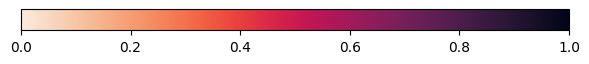

      Age Standarized Global Mental Health Disorders Prevalence (%) Statistics


In [15]:
fig, ax = plt.subplots(figsize=(6, 0.75))
cmap = mpl.colormaps['rocket_r']
norm = mpl.colors.Normalize(0, 1) 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm, cmap), ax,orientation='horizontal')
plt.tight_layout()
plt.show()
print("      Age Standarized Global Mental Health Disorders Prevalence (%) Statistics")
df_mh_world.describe().iloc[1:,1:].T.style.background_gradient(cmap="rocket_r", axis=0)

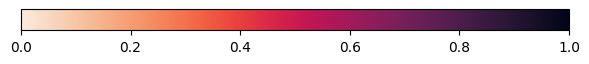

      Age Standarized Global Mental Health Disorders DALYs rate Statistics


In [16]:
fig, ax = plt.subplots(figsize=(6, 0.75))
cmap = mpl.colormaps['rocket_r']
norm = mpl.colors.Normalize(0, 1) 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm, cmap), ax,orientation='horizontal')
plt.tight_layout()
plt.show()
print("      Age Standarized Global Mental Health Disorders DALYs rate Statistics")
df_mh_burden_world.describe().iloc[1:,1:].T.style.background_gradient(cmap="rocket_r", axis=0)

When analyzing both prevalence and DALY rates together, a clear pattern emerges:

- **Depressive and anxiety disorders** are the **most prevalent globally** (≈3.5–3.8%) but show a **moderate individual burden** (≈105–185 DALYs). This suggests that while they are **widespread**, their average **severity per case is lower** compared to less common disorders.

- In contrast, **schizophrenia and eating disorders** have very **low prevalence** (≈0.16–0.29%) but high DALY rates (≈360–594), indicating a **severe impact on individual** functioning and **quality of life**.

- **Bipolar disorder** lies in between, with **moderate values in both prevalence (≈0.49%) and burden (≈34 DALYs)**.

Overall, this combined view highlights two key challenges for global mental health:

- High-prevalence disorders (depression, anxiety) require broad preventive and treatment coverage due to their societal reach.

- Low-prevalence but high-burden disorders (schizophrenia, eating disorders) demand specialized and intensive care resources to reduce individual disability.

<br></br>

#### **Cross-country variability, distribution and progession of mental health metrics**


The following section focuses on **variability, distribution and temporal evolution of the prevalence and burden**. In order to do that, **descriptive statistics** were calculated, **univariate distributions** were represented using kernel density estimate (KDE) plots. In adition, **progression of countries' mean prevalence and burden values** were summerized in line plots, followed by statistical inference methods for **hypothesis testing**.

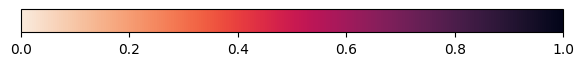

      Age Standarized Cross-Country Mental Health Disorders Prevalence (%) Statistics


In [17]:
fig, ax = plt.subplots(figsize=(7, 0.3))
cmap = mpl.colormaps['rocket_r']
norm = mpl.colors.Normalize(0, 1)  
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm, cmap), ax,orientation='horizontal')
plt.show()
print("      Age Standarized Cross-Country Mental Health Disorders Prevalence (%) Statistics")
df_mh.describe().iloc[1:,1:].T.style.background_gradient(cmap="rocket_r", axis=0)


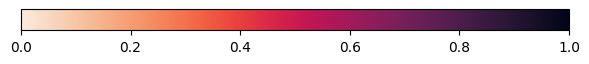

       Age Standarized Cross-Country Mental Health Disorders DALYs Rate per 100.000 Population Statistics


In [18]:
fig, ax = plt.subplots(figsize=(6, 0.75))
cmap = mpl.colormaps['rocket_r']
norm = mpl.colors.Normalize(0, 1) 
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm, cmap), ax,orientation='horizontal')
plt.tight_layout()
plt.show()
print("       Age Standarized Cross-Country Mental Health Disorders DALYs Rate per 100.000 Population Statistics")
df_mh_burden.describe().iloc[1:,1:].T.style.background_gradient(cmap="rocket_r", axis=0)

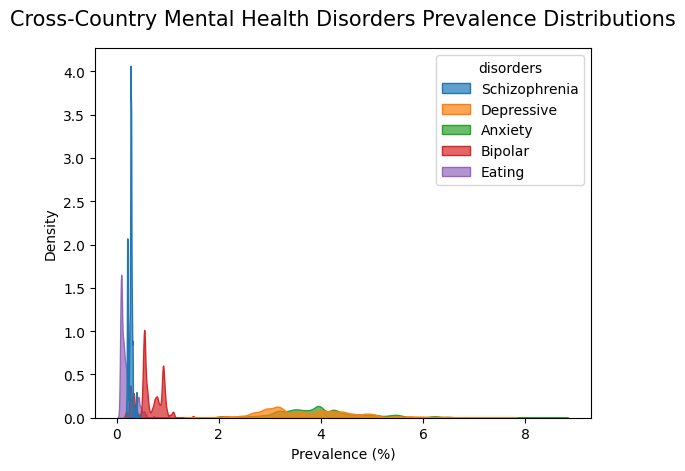

In [19]:
df_mh_melted=df_mh.melt(id_vars=["country","year"],value_vars=[ 'Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar','Eating'],var_name="disorders",value_name="prevalence")

sns.kdeplot(data=df_mh_melted,x="prevalence",hue="disorders",fill=True,alpha=0.7,bw_adjust=0.4)
plt.title("Mental Health Disorders Prevalence")
plt.xlabel("Prevalence (%)")
plt.title("Cross-Country Mental Health Disorders Prevalence Distributions",fontsize=15,y=1.04);

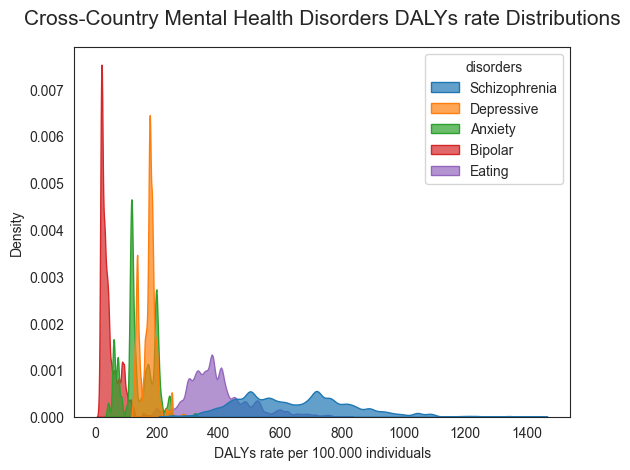

In [20]:
df_mh_burden_melted=df_mh_burden.melt(id_vars=["country","year"],value_vars=[ 'Schizophrenia', 'Depressive', 'Anxiety', 'Bipolar','Eating'],var_name="disorders",value_name="DALYs rate")

sns.set_style("white")
sns.kdeplot(data=df_mh_burden_melted,x="DALYs rate",hue="disorders",fill=True,alpha=0.7,bw_adjust=0.4)
plt.xlabel("DALYs rate per 100.000 individuals")
plt.title("Cross-Country Mental Health Disorders DALYs rate Distributions",fontsize=15,y=1.04);

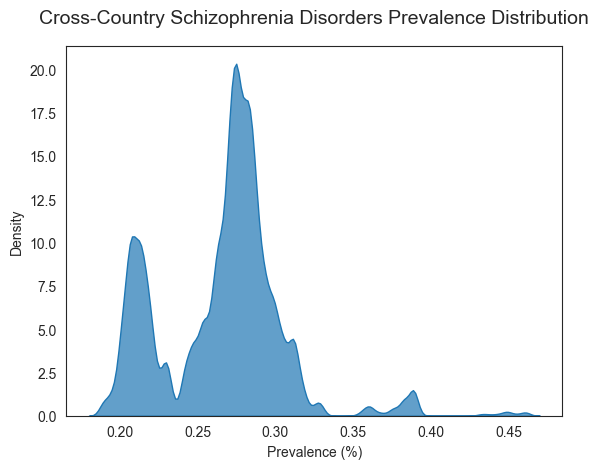

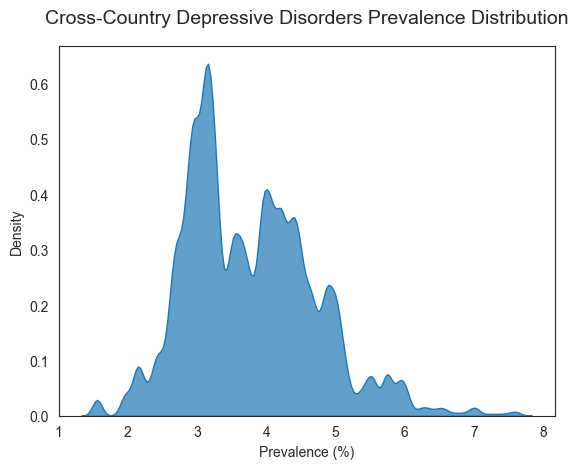

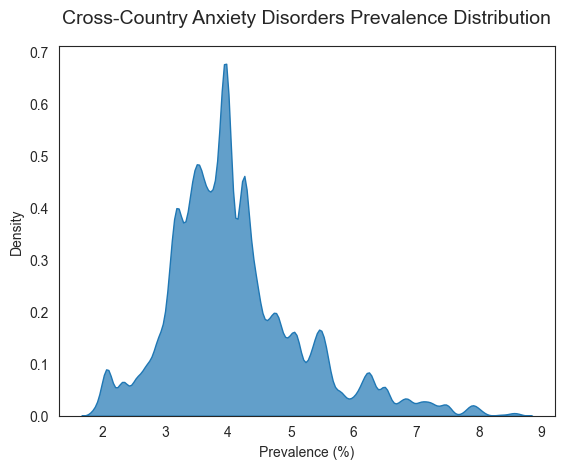

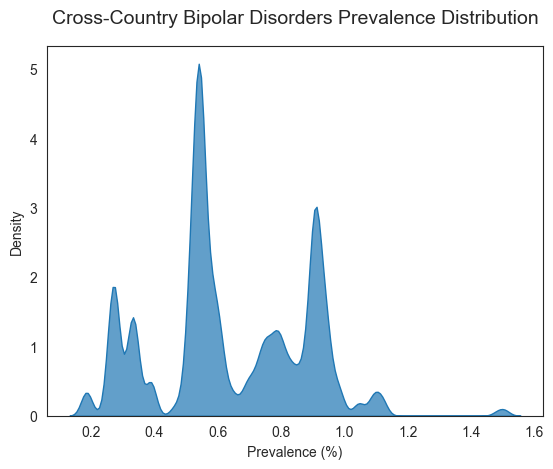

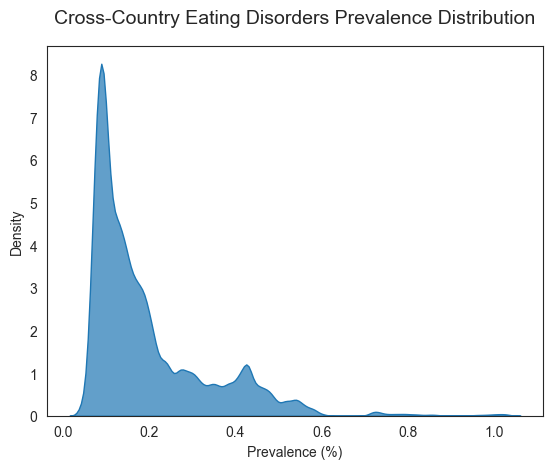

In [21]:
df_mh_c_y=df_mh.groupby(["country","year"]).mean()

sns.set_style("white")
for i,j in enumerate(df_mh_c_y.columns):
    sns.kdeplot(data=df_mh_c_y[j],fill=True,alpha=0.7,bw_adjust=0.4)
    plt.xlabel("Prevalence (%)")
    plt.title(f"Cross-Country {df_mh_c_y.columns[i]} Disorders Prevalence Distribution", fontsize=14,y=1.04)
    plt.show()

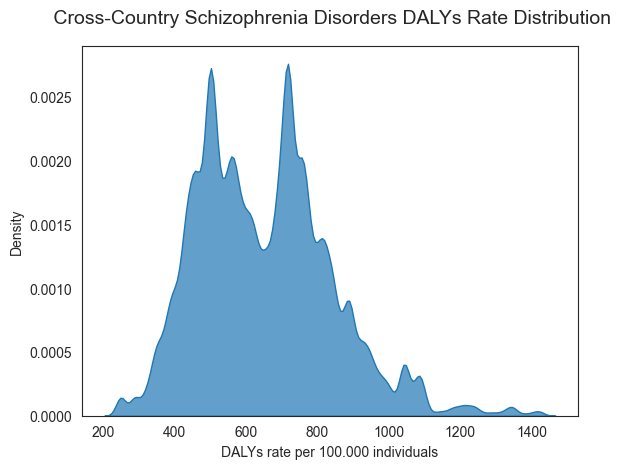

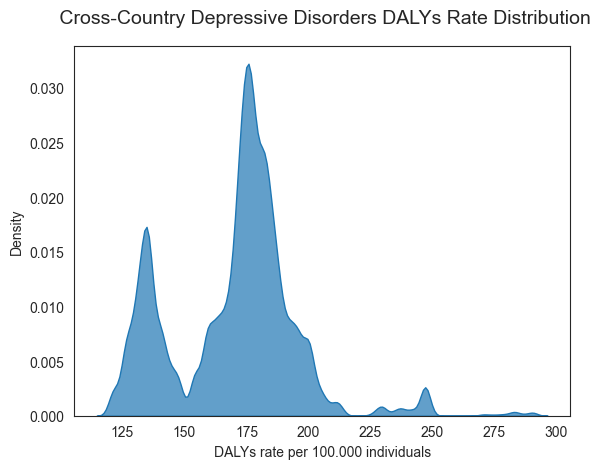

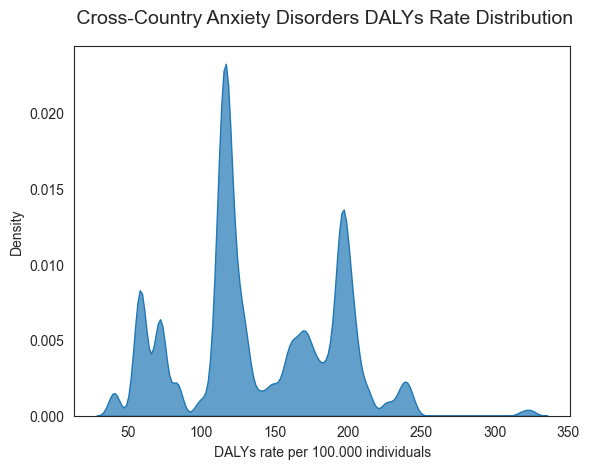

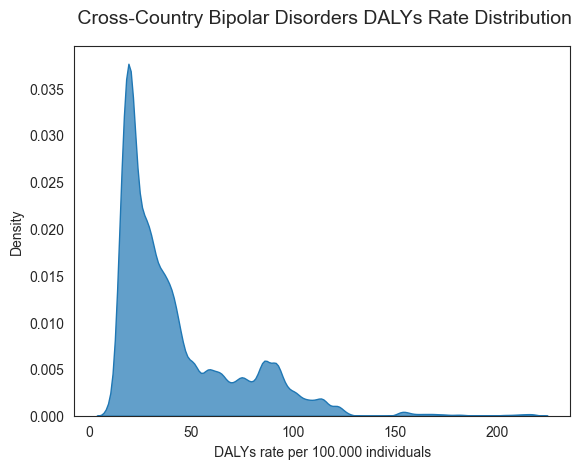

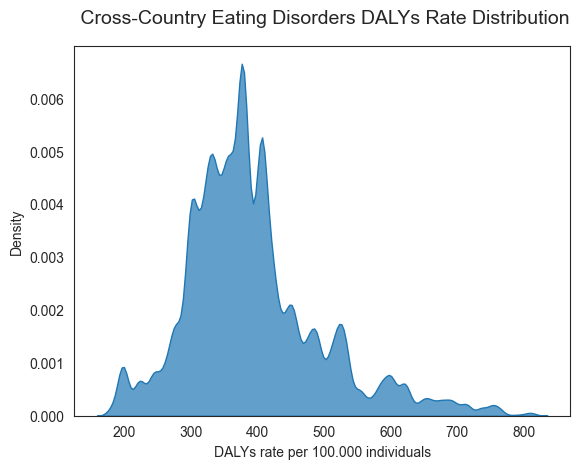

In [22]:
df_mh_burden_c_y=df_mh_burden.groupby(["country","year"]).mean()

sns.set_style("white")
for i,j in enumerate(df_mh_burden_c_y.columns):
    sns.kdeplot(data=df_mh_burden_c_y[j],fill=True,alpha=0.7,bw_adjust=0.4)
    plt.xlabel("Prevalence")
    plt.title(f" Cross-Country {j} Disorders DALYs Rate Distribution",fontsize=14,y=1.04)
    plt.xlabel("DALYs rate per 100.000 individuals")   
    plt.show()

These visualizations reveal how each disorder contributes differently to both the frequency and severity of mental health burdens across populations:

1. **Schizophrenia**:
The prevalence distribution is highly concentrated near zero, indicating that schizophrenia **affects only a small fraction of the population** globally. However, in the DALYs distribution, the curve extends far to the right, showing a long right-skewed tail. This suggests that, **while rare**, schizophrenia **produces an exceptionally high health burden** in certain regions or populations.

2. **Depressive Disorders**:
The **prevalence** curve **is broader and flatter**, extending toward higher percentages, implying that depression is common and widely distributed. In the DALYs plot, depressive disorders show a moderate and relatively symmetric distribution, suggesting a **consistent level of disease burden across populations**. These patterns underline depression’s as a condition with incosistent cross-country frequence, with less a variable severity compared to other disorders.

3. **Anxiety Disorders**:
The**prevalence** distribution **closely mirrors** that of **depressive disorders**, though with slightly lower overall density at higher values, indicating similar but somewhat lower population reach. Its **DALYs distribution is narrower and centered around moderate levels**, showing that anxiety contributes steadily but less severely to the total mental health burden. Together, these curves depict anxiety as a **frequent but moderately disabling** disorder, consistent across regions.

4. **Bipolar Disorder**:
The **prevalence distribution is narrow and sharply peaked**, concentrated at **low percentages**.Likewise, the **DALYs** distribution remains **tight and near zero**, reflecting **limited global variation and** a **lower** overall **burden**.This shape suggests that **bipolar disorder**, while serious on an individual level, **contributes minimally to** global variability in **mental health outcomes**.

5. **Eating Disorders**:
The prevalence curve shows a **modest peak** near the lower range but with slightly **broader dispersion**, implying **regional variability in occurrence**. In contrast, the DALYs distribution features a distinct peak around moderate values, indicating a **notably high individual burden despite low prevalence**. This pattern identifies eating disorders as **high-impact** yet **underrepresented conditions**, but **significant in specific populations**.

<br/><br/>

On the next step we are going to represent and analyze the **general progression mental health disorders through the different countries**. Taking in account the prevalence and DALYs rate distributions showed before we can discard Gaussian Distribution without performing normality tests.**Wilcoxon non-parametric test for paired samples** seemed like a conservative approach **for all of the hypothesis contrast** that we are going to perform **in this section of the EDA**.  


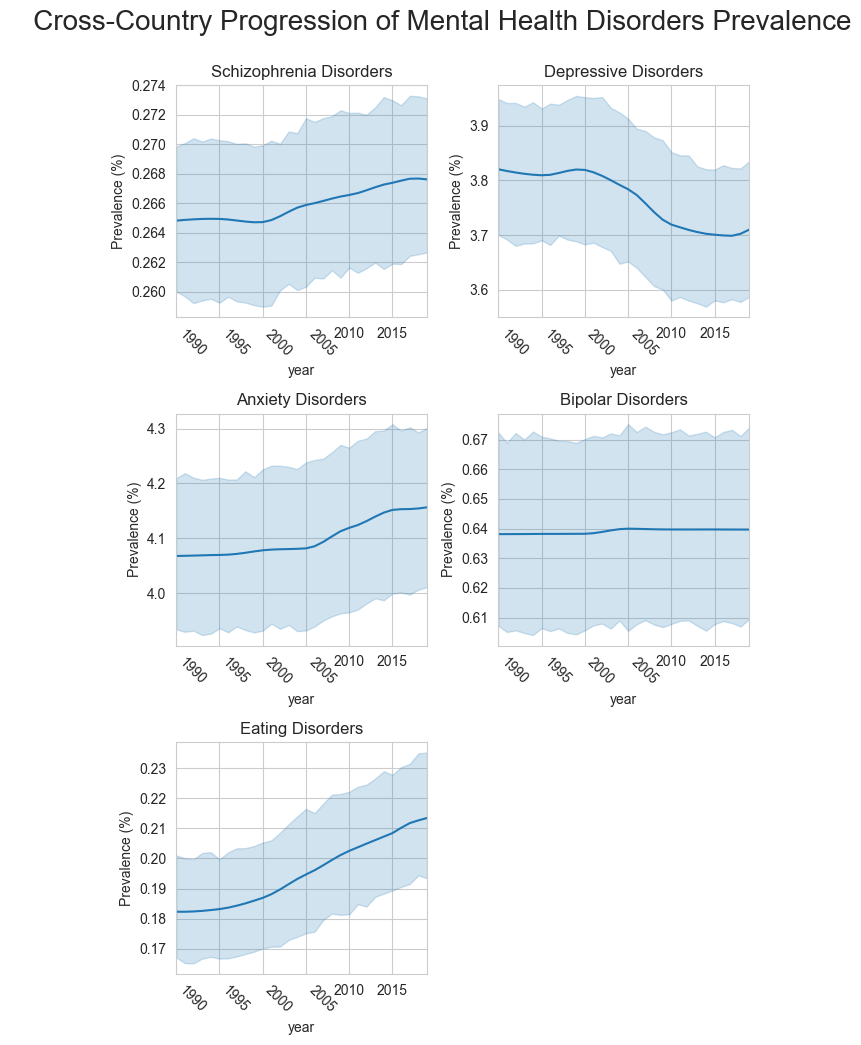

In [23]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches(6.67,10)
for i,j in enumerate(df_mh_c_y.columns):
    plt.subplot(3,2,i+1)
    sns.lineplot(data=df_mh_c_y,x="year",y=j)
    plt.xlim(1990,2019)
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(f"{j} Disorders")
    plt.ylabel("Prevalence (%)")
plt.tight_layout()
plt.gcf().figure.suptitle("   Cross-Country Progression of Mental Health Disorders Prevalence", y=1.04,fontsize=20);

In [24]:
pvalues=list()
fold_change=[]
disorder=[]
for i in df_mh_c_y.columns:
    disorder.append(i)
    pvalues.append(ss.wilcoxon(df_mh[df_mh.year==1990][i],df_mh[df_mh.year==2019][i]).pvalue)
    fold_change.append(100*(df_mh[df_mh.year==2017][i].median()/df_mh[df_mh.year==1990][i].median()))
df_mh_contrast=pd.DataFrame({"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_contrast

disorders  fold change percentage      p-values
0  Schizophrenia              101.166578  3.872181e-09
1     Depressive               96.759422  2.985719e-07
2        Anxiety              102.286652  1.055264e-19
3        Bipolar               99.887490  4.323527e-02
4         Eating              117.233785  1.511289e-27

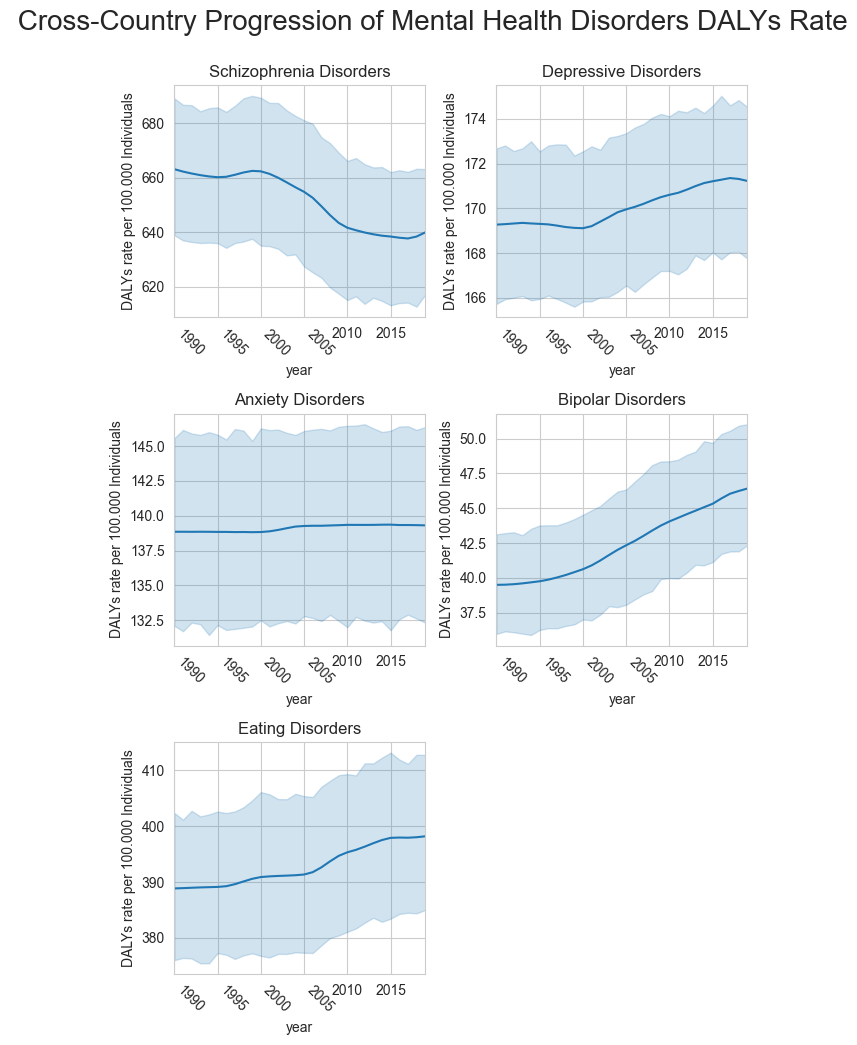

In [25]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches(6.67,10)
for i,j in enumerate(df_mh_burden_c_y.columns):
    plt.subplot(3,2,i+1)
    sns.lineplot(data=df_mh_burden_c_y,x="year",y=j)
    plt.xlim(1990,2019)
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.title(f"{j} Disorders")
    plt.ylabel("DALYs rate per 100.000 Individuals")
plt.tight_layout()
plt.gcf().figure.suptitle(" Cross-Country Progression of Mental Health Disorders DALYs Rate", y=1.04,fontsize=20);

In [26]:
pvalues=list()
fold_change=[]
disorder=[]
for i in df_mh_c_y.columns:
    disorder.append(i)
    pvalues.append(ss.wilcoxon(df_mh_burden[df_mh_burden.year==1990][i],df_mh_burden[df_mh_burden.year==2019][i]).pvalue)
    fold_change.append(100*(df_mh_burden[df_mh_burden.year==2017][i].median()/df_mh_burden[df_mh_burden.year==1990][i].median()))
df_mh_burden_contrast=pd.DataFrame({"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_burden_contrast

disorders  fold change percentage      p-values
0  Schizophrenia               94.871536  7.539373e-08
1     Depressive              100.980742  3.300937e-09
2        Anxiety              100.804886  6.267740e-04
3        Bipolar              113.732340  6.952925e-29
4         Eating              102.252178  2.061742e-21

Representations of the progression and hypothesis testing revealed statistically **significant temporal changes in both the prevalence and disease burden** of all five major mental health disorders analyzed ($p-values < 10^{-4}$ in all cases). These results indicate that global mental health trends have not remained static; instead, each disorder exhibits distinct evolutionary patterns in terms of frequency and severity:
1. **Schizophrenia**:
Despite a **slight increase in prevalence** (fold change 101.07%), schizophrenia shows a **significant reduction in burden** (fold change 103.83%). This contrast suggests that while the number of diagnosed cases has grown marginally—possibly **due to improved detection**—the **severity** and disability associated with the disorder **have decreased**, reflecting **advances in treatment** and long-term management.

2. **Depressive Disorders**:
Depression presents a **small but significant decline in prevalence** (fold change 103.18%) alongside a slight **increase in burden** (fold change 101.23%). This pattern implies that **fewer individuals** are affected, **but** those who are may experience **more severe or chronic symptoms**, leading to a higher cumulative disability load. It **highlights persistent gaps in effective**, sustained **treatment** despite widespread recognition.

3. **Anxiety Disorders**:
Anxiety disorders show a clear **rise in both prevalence (fold change 102.10%) and burden (fold change 100.35%)**, confirming their **growing global impact**. The parallel increase indicates both broader exposure and persistent functional impairment, **possibly linked to rising psychosocial stressors**, digital overload, and post-crisis mental health challenges.

4. **Bipolar Disorder**:
Although **prevalence** remains nearly **stable** (fold change 100.24%), the **burden has increased dramatically** (fold change 116.56%). This strong divergence suggests that **disease severity** and disability per individual **have worsened**, potentially **reflecting limited treatment access, underdiagnosis of mild cases**, or an increase in severe episodes being captured in global datasets.

5. **Eating Disorders**:
Eating disorders display the **largest increase in prevalence (fold change 116.17%)** and a **substantial rise in burden** (fold change 102.34%), indicating both expanding occurrence and sustained severity. These trends **align with sociocultural pressures, globalized beauty standards, and insufficient early intervention**, underscoring an **urgent public health concern**.

<br></br>

#### **Analysis of mental health disorders prevalence and burden by geographic region**

In this section we are going to analyze the **temporal progression and the stacked prevalence and burden data of different geographic regions**, using **line plots and stacked bar plots**. Regional classification was done following two different criteria: **continents in prevalence** data and [**World Health Organization (WHO) geographic regions**](https://ourworldindata.org/grapher/who-regions) in **burden data**.

In order to carry hypothesis testing on **two time series** that do not follow normal distribution, **which differs in median values** (also known as percentile 50), we are going test median shift while accounting for time explicitly using **quantile regression tests of the median**. This test is going to be performed using **statsmodels library**.

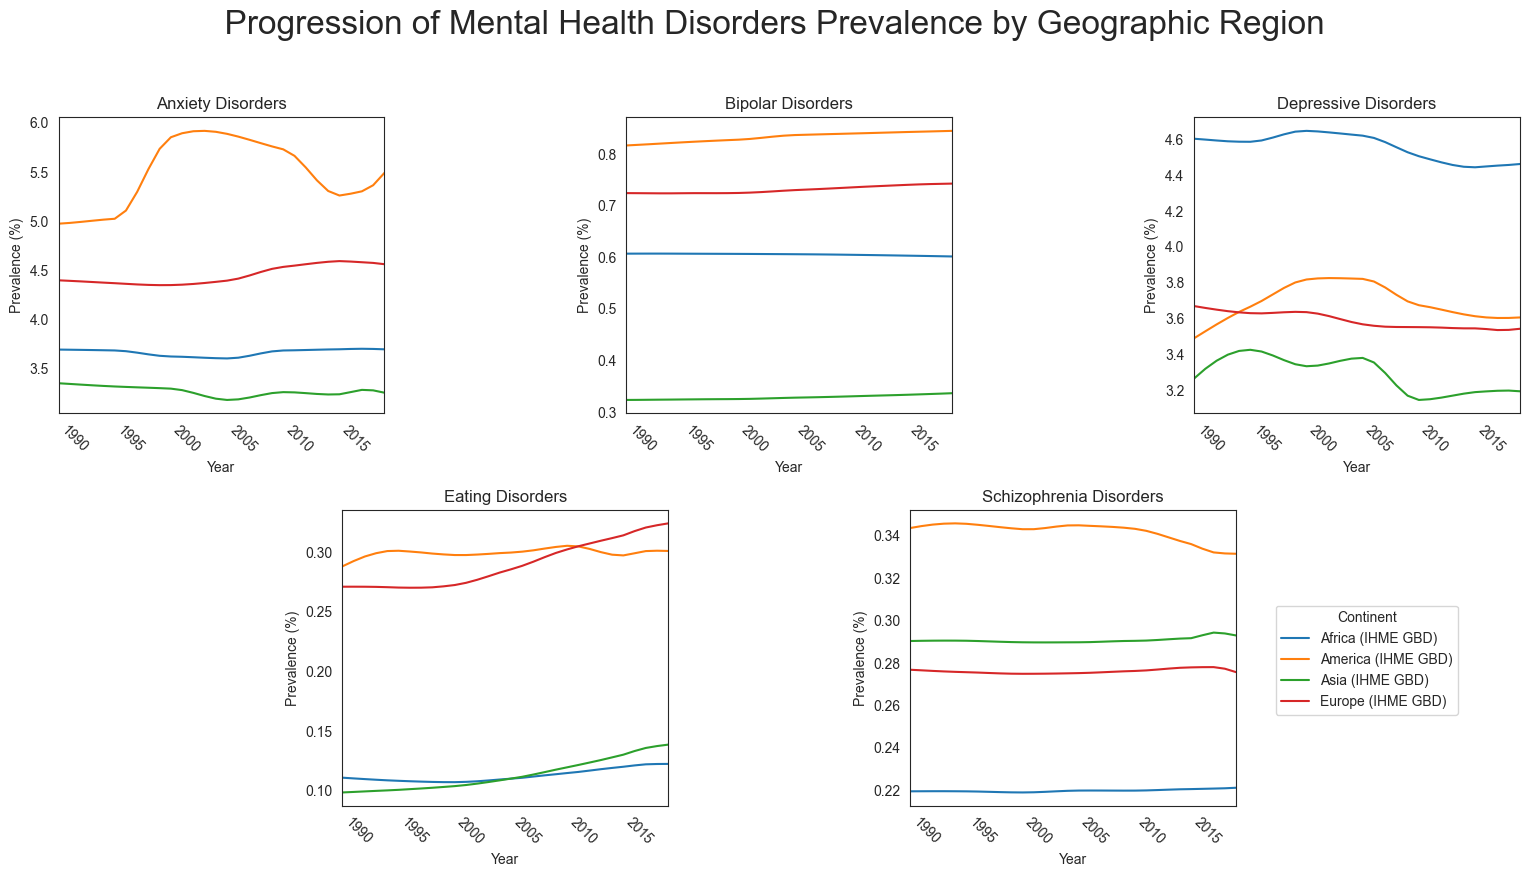

In [62]:
df_mh_cont_c_y=df_mh_cont.groupby(["country","year"]).mean()
sns.set_style("white")
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
sns.lineplot(data=df_mh_cont_c_y,x="year",y="Anxiety",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Anxiety Disorders")


plt.subplot2grid((2,6), (0,2), colspan=2)
sns.lineplot(data=df_mh_cont_c_y,x="year",y="Bipolar",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Bipolar Disorders")


plt.subplot2grid((2,6), (0,4), colspan=2)
sns.lineplot(data=df_mh_cont_c_y,x="year",y="Depressive",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Depressive Disorders")


plt.subplot2grid((2,6), (1,1), colspan=2)
sns.lineplot(data=df_mh_cont_c_y,x="year",y="Eating" ,hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Eating Disorders")

plt.subplot2grid((2,6), (1,3), colspan=2)
ax=sns.lineplot(data=df_mh_cont_c_y,x="year",y="Schizophrenia",hue="country")
plt.xlim(1990,2019)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Schizophrenia Disorders")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
ax.legend(fontsize='xx-large',title="Continent")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1,0.7))

plt.gcf().set_size_inches(15.4,8)
plt.tight_layout();
plt.gcf().figure.suptitle("  Progression of Mental Health Disorders Prevalence by Geographic Region", y=1.09,fontsize=24);

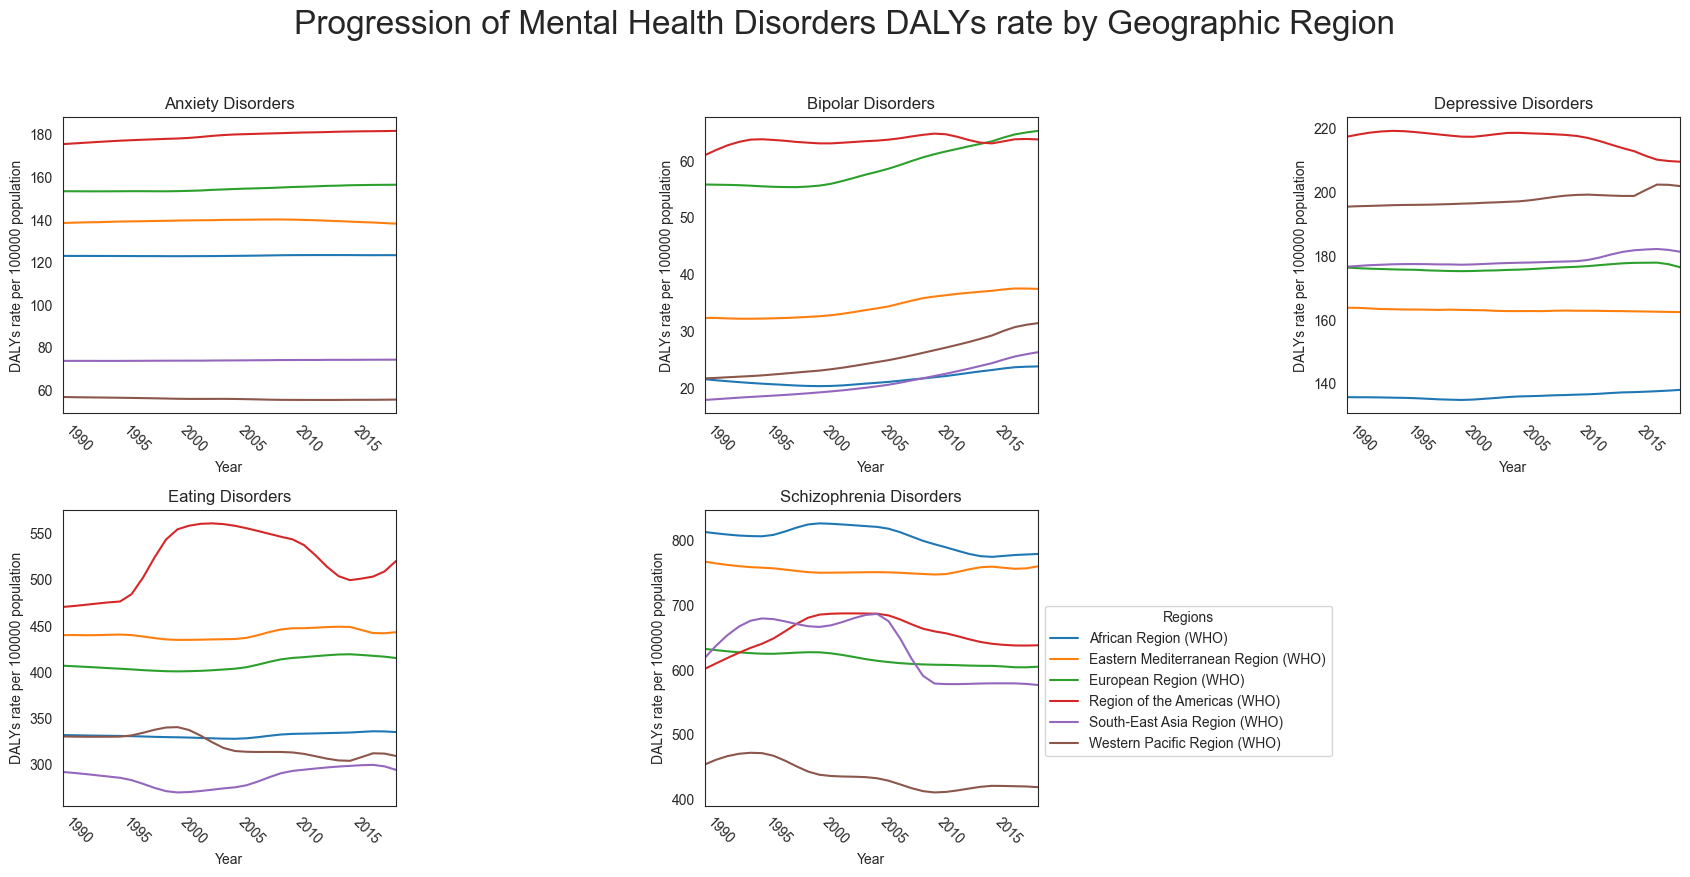

In [28]:
df_mh__burden_cont_c_y=df_mh_burden_cont.groupby(["country","year"]).mean()
sns.set_style("white")
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
sns.lineplot(data=df_mh__burden_cont_c_y,x="year",y="Anxiety",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Anxiety Disorders")


plt.subplot2grid((2,6), (0,2), colspan=2)
sns.lineplot(data=df_mh__burden_cont_c_y,x="year",y="Bipolar",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Bipolar Disorders")


plt.subplot2grid((2,6), (0,4), colspan=2)
sns.lineplot(data=df_mh__burden_cont_c_y,x="year",y="Depressive",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Depressive Disorders")


plt.subplot2grid((2,6), (1,0), colspan=2)
sns.lineplot(data=df_mh__burden_cont_c_y,x="year",y="Eating" ,hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Eating Disorders")

plt.subplot2grid((2,6), (1,2), colspan=2)
ax=sns.lineplot(data=df_mh__burden_cont_c_y,x="year",y="Schizophrenia",hue="country")
plt.xlim(1990,2019)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Schizophrenia Disorders")
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
ax.legend(fontsize='xx-large',title="Regions")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.0,0.7))
plt.gcf().set_size_inches(17,8)
plt.gcf().tight_layout();
plt.gcf().figure.suptitle("Progression of Mental Health Disorders DALYs rate by Geographic Region", y=1.09,fontsize=24);

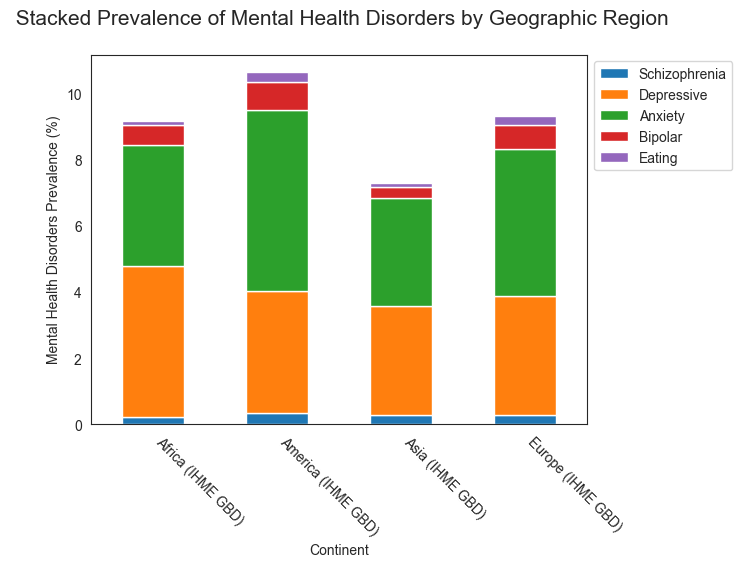

In [61]:
df_mh_cont_mean=df_mh_cont.groupby("country").mean().iloc[:,1:]
ax=df_mh_cont_mean.plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders Prevalence (%)")
plt.xlabel("Continent")
plt.title(" Stacked Prevalence of Mental Health Disorders by Geographic Region",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [63]:
pvalues = []
fold_change = []
cat = []
df_mh_cont_sum = (df_mh_cont["Schizophrenia"] +df_mh_cont["Depressive"] +df_mh_cont["Anxiety"] +df_mh_cont["Bipolar"] +df_mh_cont["Eating"])
df_mh_cont_sum.index = df_mh_cont.country
df_mh_world_total = (df_mh_world["Schizophrenia"] +df_mh_world["Depressive"] +df_mh_world["Anxiety"] +df_mh_world["Bipolar"] +df_mh_world["Eating"])
df_mh_world_total_values = df_mh_world_total.reset_index(drop=True)
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]

for continente in df_mh_cont_mean.index:
    df_test = df_mh_cont_sum[df_mh_cont_sum.index == continente].reset_index(drop=True)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test, df_mh_world_total_values]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_world_total_values),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100 * (df_test.median() / df_mh_world_total_values.median()))
    cat.append(continente)
df_mh_contrast_th = pd.DataFrame({"continent": cat,"fold change percentage": fold_change,"p-values": pvalues})
df_mh_contrast_th

continent  fold change percentage      p-values
0   Africa (IHME GBD)              111.078296  6.865479e-64
1  America (IHME GBD)              128.815187  9.776588e-46
2     Asia (IHME GBD)               88.437603  3.391012e-44
3   Europe (IHME GBD)              112.799094  1.024913e-37

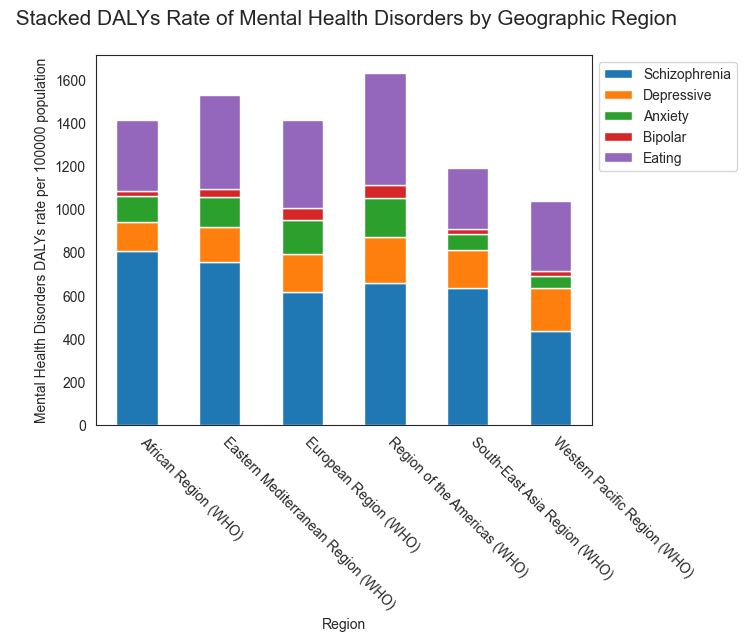

In [64]:
df_mh_burden_cont_mean=df_mh_burden_cont.groupby("country").mean().iloc[:,1:]
ax=df_mh_burden_cont_mean.plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders DALYs rate per 100000 population")
plt.xlabel("Region")
plt.title(" Stacked DALYs Rate of Mental Health Disorders by Geographic Region",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [32]:
pvalues = []
fold_change = []
cat = []
df_mh_burden_cont_sum = (df_mh_burden_cont["Schizophrenia"] +df_mh_burden_cont["Depressive"] +df_mh_burden_cont["Anxiety"] +df_mh_burden_cont["Bipolar"] +df_mh_burden_cont["Eating"])
df_mh_burden_cont_sum.index = df_mh_burden_cont.country
df_mh_burden_world_total = (df_mh_burden_world["Schizophrenia"] +df_mh_burden_world["Depressive"] +df_mh_burden_world["Anxiety"] +df_mh_burden_world["Bipolar"] +df_mh_burden_world["Eating"])
df_mh_burden_world_total_values = df_mh_burden_world_total.reset_index(drop=True)
years=df_mh_burden_cont[df_mh_burden_cont.country=="African Region (WHO)"]["year"]

for region in df_mh_burden_cont_mean.index:
    df_test = df_mh_burden_cont_sum[df_mh_burden_cont_sum.index == region].reset_index(drop=True)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test, df_mh_burden_world_total_values]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_burden_world_total_values),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100 * (df_test.median() / df_mh_burden_world_total_values.median()))
    cat.append(region)
df_mh_contrast_th = pd.DataFrame({"region": cat,"fold change percentage": fold_change,"p-values": pvalues})
df_mh_contrast_th


region  fold change percentage      p-values
0                African Region (WHO)              110.706845  7.447084e-38
1  Eastern Mediterranean Region (WHO)              119.663944  4.533257e-49
2               European Region (WHO)              110.383136  8.359073e-37
3        Region of the Americas (WHO)              127.221298  4.142923e-45
4        South-East Asia Region (WHO)               94.040766  1.841613e-20
5        Western Pacific Region (WHO)               80.132134  5.375318e-47

Focusing geographic regions, the **Region of the Americas and Europe** consistently **show the highest prevalence and DALY rates across most disorders**, indicating both higher detection and greater years lived with disability. In contrast, **Africa and South-East Asia/Asia report lower prevalence but higher DALYs in certain disorders** in comparison (e.g., schizophrenia), suggesting **possible underdiagnosis combined with limited treatment access**. Hypothesis testing shows significant results ( $p-values < 10^{-20}$ ) for all of the differences compared to global 

<br/><br/>


#### **Analysis of mental health disorders prevalence and burden by countries' income level**

The following analysis examines how **prevalence** and **DALYs rates** for major mental health disorders have evolved between **1990 and 2019**, segmented by **income level**. The temporal progression is going to be visualize using **line plots**. In adition, differences in stacked prevalence and burden values are going to be represented using **stacked bar plots** and analyze using a **Wilcoxon non-parametric tests**. In this case, income level categories were stablished using [The World Bank criteria](https://datatopics.worldbank.org/world-development-indicators/the-world-by-income-and-region.html). 

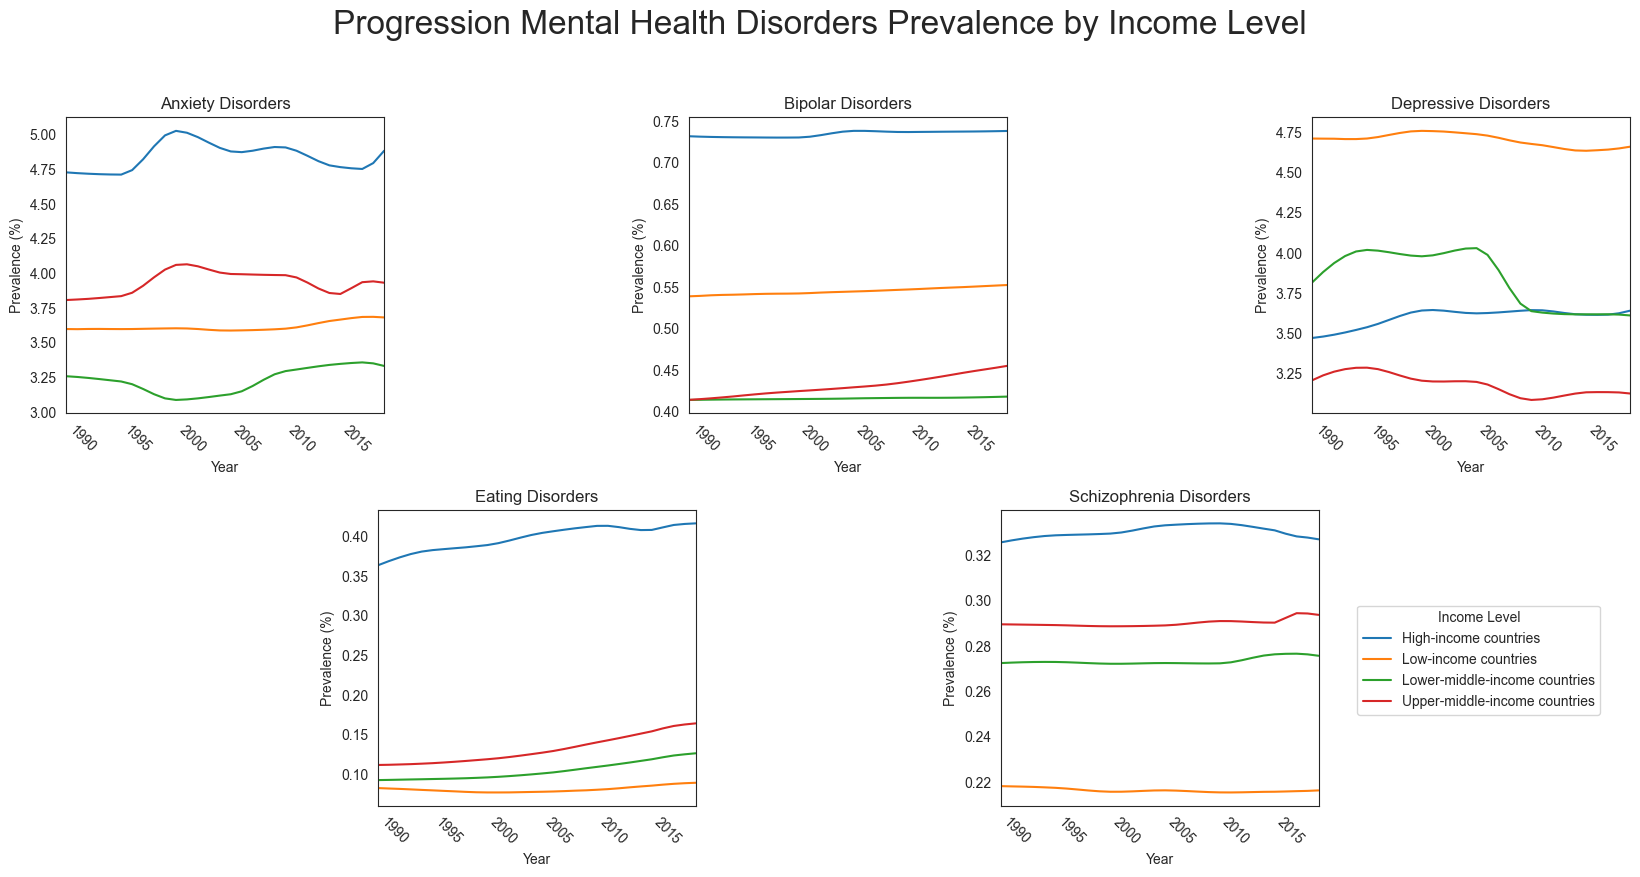

In [59]:
df_mh_income_c_y=df_mh_income.groupby(["country","year"]).mean()
sns.set_style("white")
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
sns.lineplot(data=df_mh_income_c_y,x="year",y="Anxiety",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Anxiety Disorders")


plt.subplot2grid((2,6), (0,2), colspan=2)
sns.lineplot(data=df_mh_income_c_y,x="year",y="Bipolar",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Bipolar Disorders")


plt.subplot2grid((2,6), (0,4), colspan=2)
sns.lineplot(data=df_mh_income_c_y,x="year",y="Depressive",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Depressive Disorders")


plt.subplot2grid((2,6), (1,1), colspan=2)
sns.lineplot(data=df_mh_income_c_y,x="year",y="Eating" ,hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Eating Disorders")

plt.subplot2grid((2,6), (1,3), colspan=2)
ax=sns.lineplot(data=df_mh_income_c_y,x="year",y="Schizophrenia",hue="country")
plt.xlim(1990,2019)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Schizophrenia Disorders")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
ax.legend(fontsize='xx-large',title="Income Level")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.1,0.7))

plt.gcf().set_size_inches(16.5,8)
plt.tight_layout();
plt.gcf().figure.suptitle("Progression Mental Health Disorders Prevalence by Income Level", y=1.09,fontsize=24);

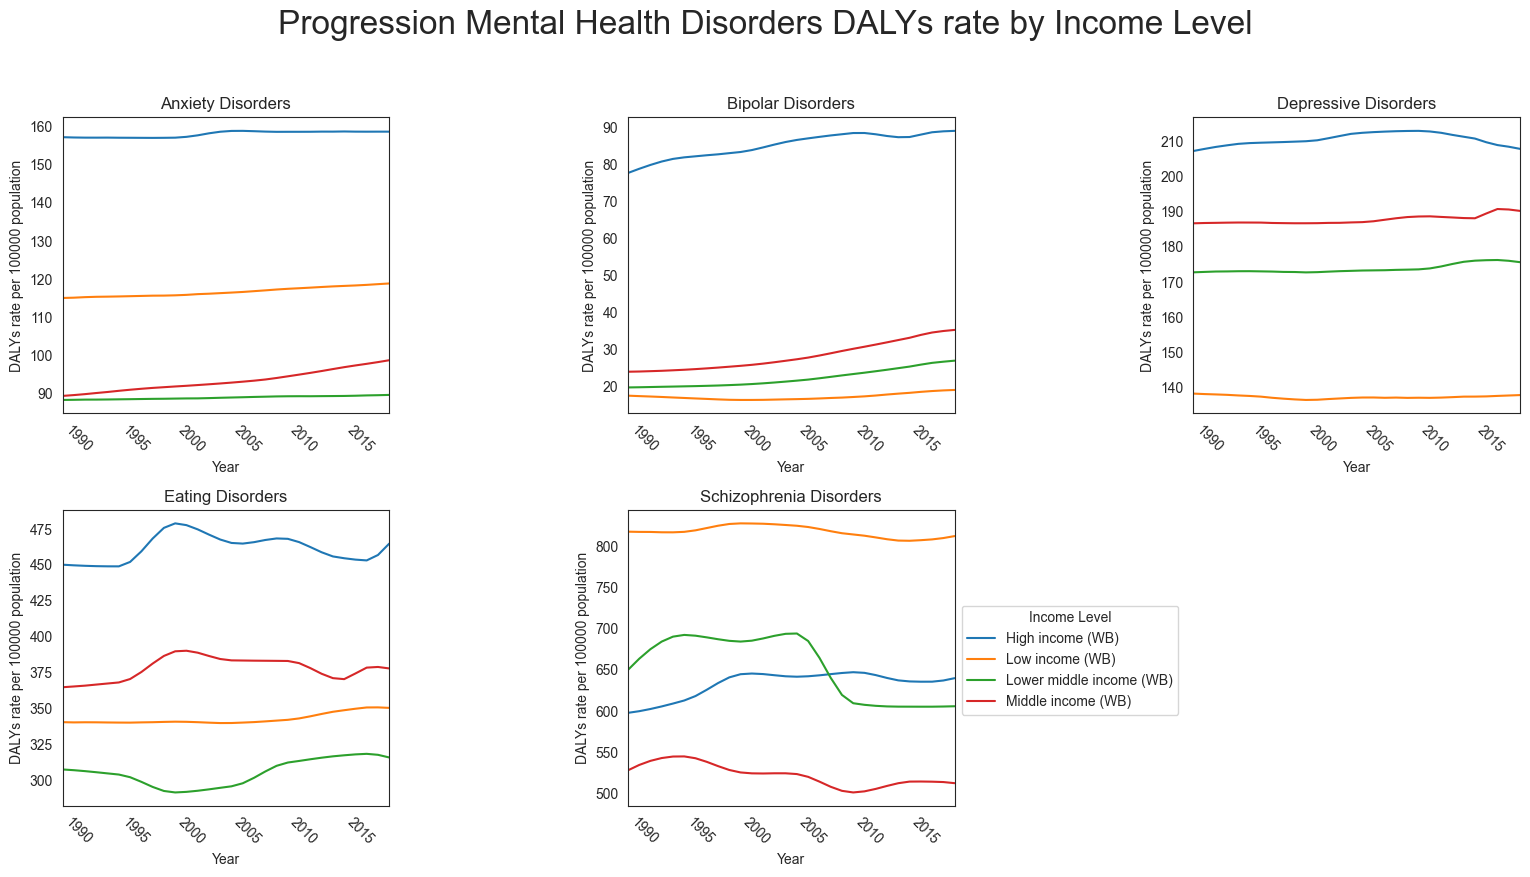

In [60]:
df_mh__burden_income_c_y=df_mh_burden_income.groupby(["country","year"]).mean()
sns.set_style("white")
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
sns.lineplot(data=df_mh__burden_income_c_y,x="year",y="Anxiety",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Anxiety Disorders")


plt.subplot2grid((2,6), (0,2), colspan=2)
sns.lineplot(data=df_mh__burden_income_c_y,x="year",y="Bipolar",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Bipolar Disorders")


plt.subplot2grid((2,6), (0,4), colspan=2)
sns.lineplot(data=df_mh__burden_income_c_y,x="year",y="Depressive",hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Depressive Disorders")


plt.subplot2grid((2,6), (1,0), colspan=2)
sns.lineplot(data=df_mh__burden_income_c_y,x="year",y="Eating" ,hue="country",legend=False)
plt.xlim(1990,2019)
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Eating Disorders")

plt.subplot2grid((2,6), (1,2), colspan=2)
ax=sns.lineplot(data=df_mh__burden_income_c_y,x="year",y="Schizophrenia",hue="country")
plt.xlim(1990,2019)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.title("Schizophrenia Disorders")
plt.xlabel("Year")
plt.ylabel("DALYs rate per 100000 population")
ax.legend(fontsize='xx-large',title="Income Level")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.0,0.7))
plt.gcf().set_size_inches(15.4,8)
plt.gcf().tight_layout();
plt.gcf().figure.suptitle("Progression Mental Health Disorders DALYs rate by Income Level", y=1.09,fontsize=24);

 The results reveal that, **except for schizophrenia**, **high-income countries** exhibit both **higher prevalence** and **greater disability burden**, suggesting that mental health challenges are **more visible and impactful** in developed contexts, while **underdiagnosis** may persist in lower-income regions.

1. **Anxiety Disorders**:
Anxiety disorders are **most prevalent in high-income countries**, maintaining levels close to **5%**, whereas low-income regions remain near **3%**. This difference is mirrored by a **higher disability burden**, with rates almost **double** those of lower-income countries. These findings indicate that anxiety is **both more frequent and more disabling** where lifestyles are **highly competitive and stress-intensive**, despite **diagnostic coverage is more complete**.

2. **Bipolar Disorders**
Bipolar disorder remains **relatively stable over time**, yet clearly **more prevalent and disabling in high-income countries**. The **DALY rates rise steadily** in wealthier nations, reaching values that are **three to four times greater** than in poorer regions. This pattern suggests that, despite better medical management, **chronicity and long-term disability persist**, likely due to **socioeconomic stressors**, and exacerbated by **longer life expectancy**,**greater detection of mild or moderate cases**.

3. **Depressive Disorders**
Depression follows a **parallel pattern** to anxiety, with **high-income countries leading both in prevalence and disability**. Rates of **around 4.5–5%** coexist with **the highest DALY figures (over 210 per 100,000)**. This alignment points to depression being a **central contributor to the global mental health burden**, especially in societies characterized by **social isolation, demanding work environments**, and **aging populations** that amplify its effects.

4. **Eating Disorders**
Eating disorders show the **strongest disparity by income level**, being **largely concentrated in high-income nations**. Although prevalence remains modest (~0.4%), their **impact in terms of disability is exceptionally high**, exceeding **470 DALYs per 100,000**, far above any other group. This underscores how **cultural pressures, beauty standards, and body image ideals** transform these disorders into a **severe source of disability** in developed societies.

5. **Schizophrenia Disorders**
Schizophrenia presents a **unique pattern**: while prevalence is **fairly uniform worldwide (~0.2–0.3%)**, the **burden reverses** compared to other disorders. **Low-income countries** bear the **heaviest disability rates (around 800 DALYs)**, whereas **high-income nations** remain notably lower. This contrast highlights **inequality in access to psychiatric care**, where the absence of **sustained treatment and medication** in poorer contexts translates into **greater functional and social deterioration**.

The data demonstrate that **mental health burden does not decrease with income**. Instead, **modern lifestyles, social expectations, and detection rates** in high-income countries may be amplifying both the **prevalence** and **functional impact** of mental disorders. **Eating, depressive, and anxiety disorders** emerge as the **most income-sensitive**, reflecting **socioeconomic and psychosocial stress factors**. Only in the case of **schizophrenia** does economic disadvantage correlate with **greater disability**, underscoring the critical need for **accessible psychiatric care globally**.

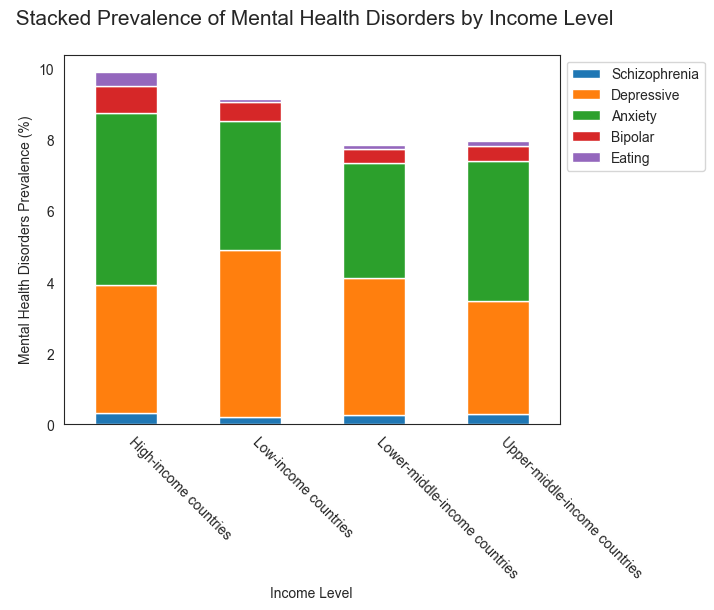

In [67]:
df_mh_income_mean=df_mh_income.groupby("country").mean().iloc[:,1:]
ax=df_mh_income_mean.plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders Prevalence (%)")
plt.xlabel("Income Level")
plt.title(" Stacked Prevalence of Mental Health Disorders by Income Level",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [65]:
pvalues=list()
fold_change=[]
cat=[]
df_mh_income_sum=df_mh_income["Schizophrenia"]+df_mh_income["Depressive"]+df_mh_income["Anxiety"]+df_mh_income["Bipolar"]+df_mh_income["Eating"]
df_mh_income_sum.index=df_mh_income.country
df_mh_world_total=df_mh_world["Schizophrenia"]+df_mh_world["Depressive"]+df_mh_world["Anxiety"]+df_mh_world["Bipolar"]+df_mh_world["Eating"]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]

for categoria in df_mh_income_mean.index:
    df_test=df_mh_income_sum[df_mh_income_sum.index==categoria]
    df_compare = pd.DataFrame({'y': np.concatenate([df_test, df_mh_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100 * (df_test.median() / df_mh_world_total.median()))
    cat.append(categoria)
df_mh_contrast_th = pd.DataFrame({"Income Level": cat,"fold change percentage": fold_change,"p-values": pvalues})
df_mh_contrast_th

Income Level  fold change percentage      p-values
0          High-income countries              120.814694  6.949607e-51
1           Low-income countries              110.972138  3.015691e-46
2  Lower-middle-income countries               95.294103  7.888706e-23
3  Upper-middle-income countries               96.538409  5.393529e-13

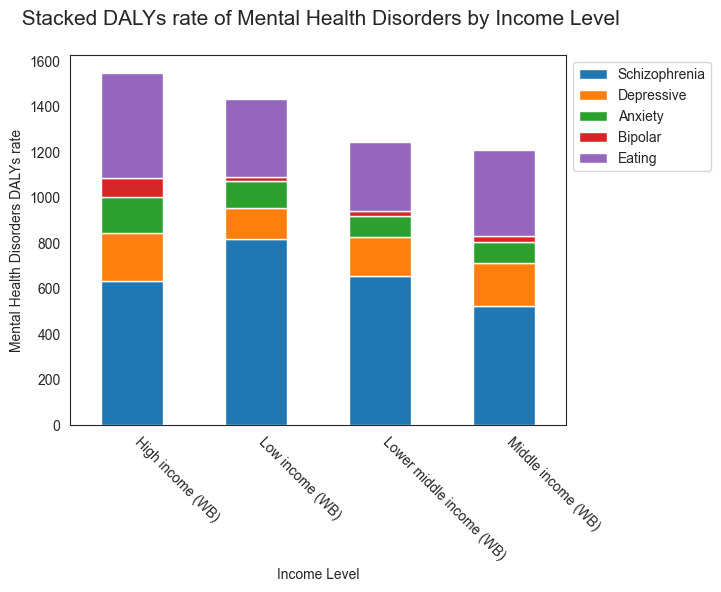

In [68]:
df_mh_burden_income_mean=df_mh_burden_income.groupby("country").mean().iloc[:,1:]
ax=df_mh_burden_income_mean.plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders DALYs rate")
plt.xlabel("Income Level")
plt.title(" Stacked DALYs rate of Mental Health Disorders by Income Level",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [66]:
pvalues=list()
fold_change=[]
cat=[]
df_mh_burden_income_sum=df_mh_burden_income["Schizophrenia"]+df_mh_burden_income["Depressive"]+df_mh_burden_income["Anxiety"]+df_mh_burden_income["Bipolar"]+df_mh_burden_income["Eating"]
df_mh_burden_income_sum.index=df_mh_burden_income.country
df_mh_burden_world_total=df_mh_burden_world["Schizophrenia"]+df_mh_burden_world["Depressive"]+df_mh_burden_world["Anxiety"]+df_mh_burden_world["Bipolar"]+df_mh_burden_world["Eating"]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]

for categoria in df_mh_burden_income_mean.index:
    df_test=df_mh_burden_income_sum[df_mh_burden_income_sum.index==categoria]
    df_compare = pd.DataFrame({'y': np.concatenate([df_test, df_mh_burden_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100 * (df_test.median() / df_mh_burden_world_total.median()))
    cat.append(continente)
df_mh_contrast_th = pd.DataFrame({"Income Level": cat,"fold change percentage": fold_change,"p-values": pvalues})
df_mh_contrast_th

Income Level  fold change percentage      p-values
0  Europe (IHME GBD)              121.546925  1.858428e-50
1  Europe (IHME GBD)              111.609592  2.506715e-41
2  Europe (IHME GBD)               97.863141  1.378073e-08
3  Europe (IHME GBD)               94.608309  6.528683e-24

Stacked prevalence and burden data confirms significant higher general mental health disorders representation and severity.**modern lifestyles, social expectations** probably act as **psychosocial stressors** in high-income countries  whereas better **detection rates** in these countries may be amplifying both the **prevalence** and **functional impact** of mental disorders. **Eating, depressive, and anxiety disorders** emerge as the **most income-sensitive**.

<br></br>

#### **Mental health disorders prevalence and burden analysis by country**

The following section of the EDA we are going to **highlight the countries with higher and lower prevalence percentage and DALYs rate** in their populations using **violin plots**, and analizing the difference with global markers of mental health using **inferecence statistics and fold change metrics**.

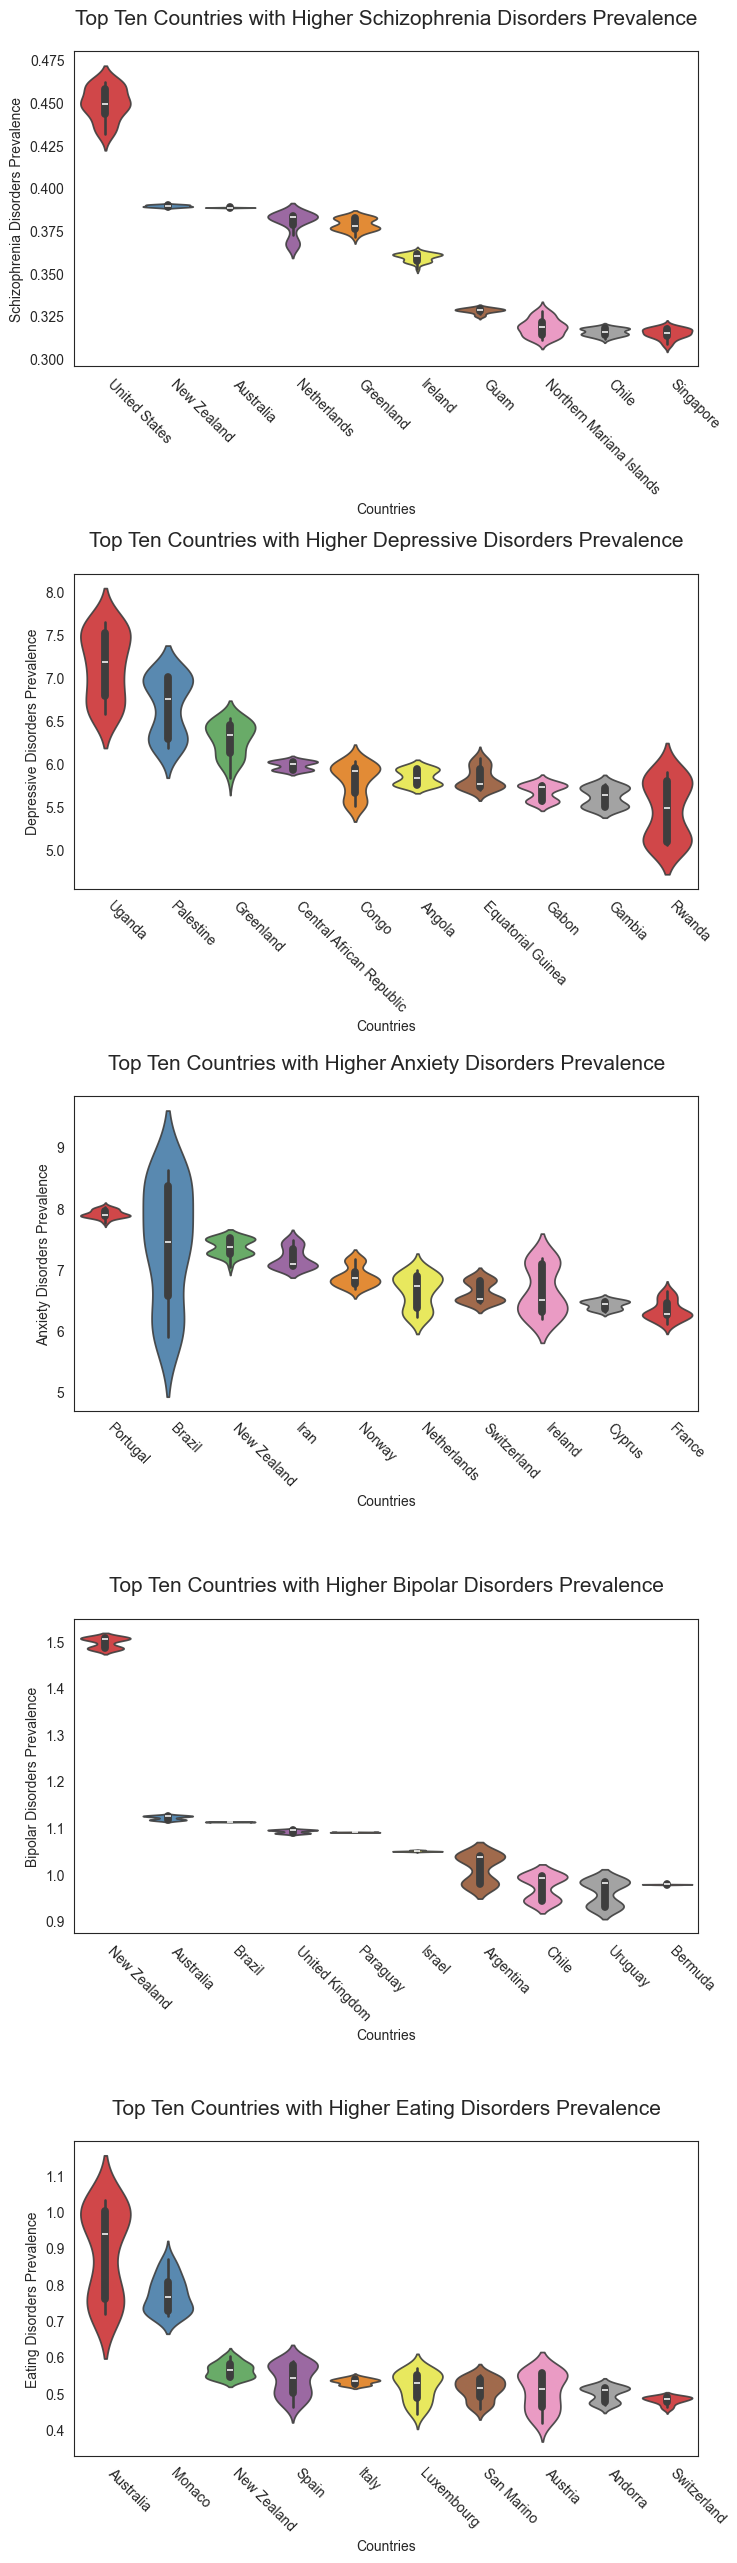

In [39]:
plt.gcf().set_size_inches(7.5,30)
for i,j in enumerate(df_mh_c_y.columns):
    plt.subplot(6,1,i+1)
    sns.violinplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=False)[:10].index)],x="country",y=j,hue="country",palette="Set1",alpha=0.9,legend=False)
    #sns.stripplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=False)[:10].index)],x="country",y=j,color="#404040")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.xlabel("Countries")
    plt.ylabel(f"{j} Disorders Prevalence")
    plt.title(f"Top Ten Countries with Higher {j} Disorders Prevalence",fontsize=15,y=1.06)
plt.tight_layout()


In [40]:
pvalues=list()
fold_change=[]
disorder=[]
paises=[]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for i in df_mh_c_y.columns:
    df_test=list(df_mh[["country","year",i]].groupby("country").median()[i].sort_values(ascending=False).index)[:10]
    for pais in df_test:
        paises.append(pais)
        disorder.append(i)
        df_compare = pd.DataFrame({'y': np.concatenate([df_mh[df_mh.country==pais][i],df_mh_world[i]]),'group': ['country'] * len(df_mh[df_mh.country==pais][i]) + ['global'] * len(df_mh_world[i]),'time':  np.tile(years, 2)})
        model = smf.quantreg('y ~ C(group) + time', data=df_compare)
        res = model.fit(q=0.5, max_iter=10000)
        pval = res.pvalues.filter(like='C(group)').iloc[0]
        pvalues.append(pval)
        fold_change.append(100 * (df_mh[df_mh.country==pais][i].median()/df_mh_world[i].median()))
df_mh_burden_contrast_h=pd.DataFrame({"country":paises,"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_burden_contrast_h

country      disorders  fold change percentage  \
0              United States  Schizophrenia              155.699360   
1                New Zealand  Schizophrenia              134.944415   
2                  Australia  Schizophrenia              134.605742   
3                Netherlands  Schizophrenia              132.733172   
4                  Greenland  Schizophrenia              130.814906   
5                    Ireland  Schizophrenia              124.800824   
6                       Guam  Schizophrenia              113.774789   
7   Northern Mariana Islands  Schizophrenia              110.338401   
8                      Chile  Schizophrenia              109.222812   
9                  Singapore  Schizophrenia              109.060423   
10                    Uganda     Depressive              203.034773   
11                 Palestine     Depressive              190.800849   
12                 Greenland     Depressive              179.080557   
13  Central African Republic     Depressive              169.555135   
14                     Congo     Depressive              167.116798   
15                    Angola     Depressive              165.113885   
16         Equatorial Guinea     Depressive              163.025313   
17                     Gabon     Depressive              162.068695   
18                    Gambia     Depressive              159.223277   
19                    Rwanda     Depressive              155.196931   
20                  Portugal        Anxiety              208.559686   
21                    Brazil        Anxiety              196.663667   
22               New Zealand        Anxiety              194.705158   
23                      Iran        Anxiety              187.090877   
24                    Norway        Anxiety              181.304497   
25               Netherlands        Anxiety              177.869138   
26               Switzerland        Anxiety              172.104155   
27                   Ireland        Anxiety              171.904040   
28                    Cyprus        Anxiety              170.218583   
29                    France        Anxiety              165.707801   
30               New Zealand        Bipolar              308.452051   
31                 Australia        Bipolar              230.457293   
32                    Brazil        Bipolar              227.938537   
33            United Kingdom        Bipolar              224.288148   
34                  Paraguay        Bipolar              223.412721   
35                    Israel        Bipolar              215.052105   
36                 Argentina        Bipolar              212.297655   
37                     Chile        Bipolar              203.372497   
38                   Uruguay        Bipolar              201.048938   
39                   Bermuda        Bipolar              200.453740   
40                 Australia         Eating              606.661091   
41                    Monaco         Eating              494.615213   
42               New Zealand         Eating              363.987092   
43                     Spain         Eating              349.903160   
44                     Italy         Eating              345.204214   
45                Luxembourg         Eating              340.885915   
46                San Marino         Eating              332.991100   
47                   Austria         Eating              330.083511   
48                   Andorra         Eating              328.794058   
49               Switzerland         Eating              312.835781   

         p-values  
0   3.006911e-104  
1   2.045462e-112  
2   1.994358e-124  
3   8.771194e-113  
4    4.076377e-79  
5    4.436306e-75  
6    4.730691e-87  
7    5.384458e-52  
8    2.328424e-45  
9    6.822169e-41  
10   8.833178e-57  
11   3.418868e-53  
12   7.130336e-63  
13   7.465041e-79  
14   2.615561e-61  
15   7.620189e-79  
16   4.964649e-68  
17   8.821586e-71  
18   1.470821e-62  

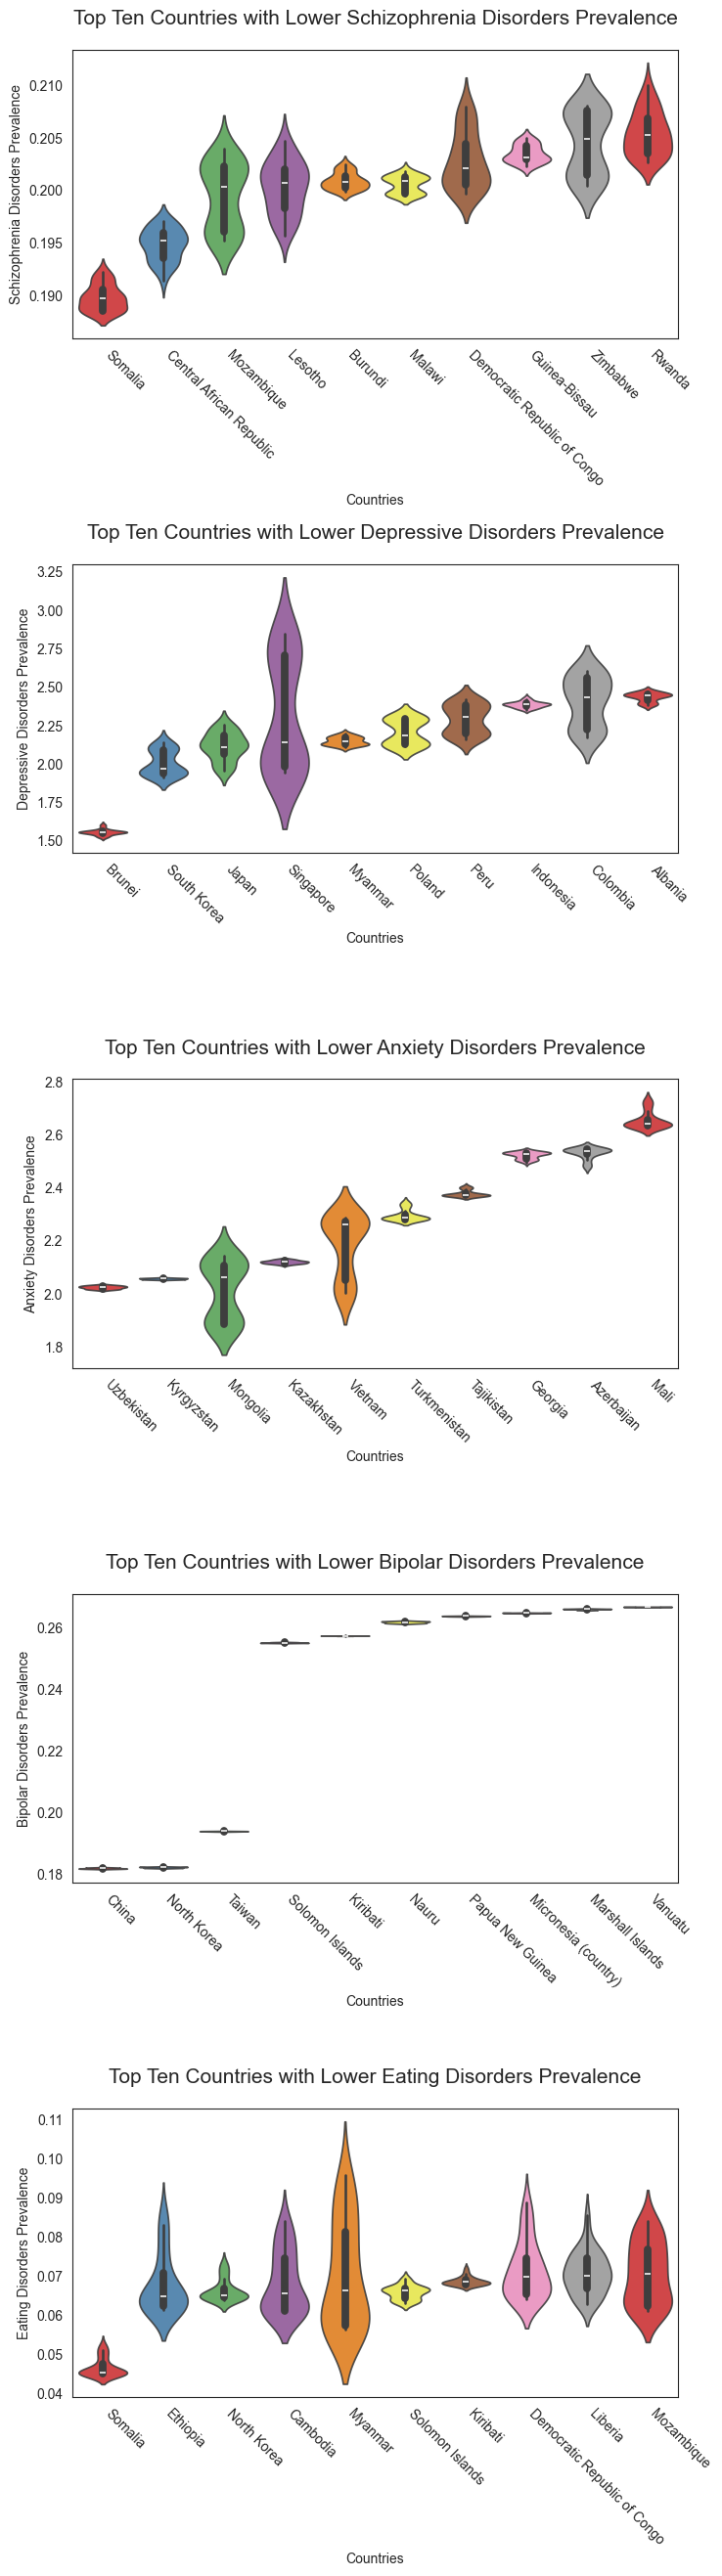

In [41]:
plt.gcf().set_size_inches(7.5,30)
for i,j in enumerate(df_mh_c_y.columns):
    plt.subplot(6,1,i+1)
    sns.violinplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=True)[:10].index)],x="country",y=j,hue="country",palette="Set1",alpha=0.9,legend=False)
    #sns.stripplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=True)[:10].index)],x="country",y=j,color="#404040")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.xlabel("Countries")
    plt.ylabel(f"{j} Disorders Prevalence")
    plt.title(f"Top Ten Countries with Lower {j} Disorders Prevalence",fontsize=15,y=1.06)
plt.tight_layout()

In [42]:
pvalues=list()
fold_change=[]
disorder=[]
paises=[]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for i in df_mh_c_y.columns:
    df_test=list(df_mh[["country","year",i]].groupby("country").median()[i].sort_values(ascending=True).index)[:10]
    for pais in df_test:
        paises.append(pais)
        disorder.append(i)
        df_compare = pd.DataFrame({'y': np.concatenate([df_mh[df_mh.country==pais][i],df_mh_world[i]]),'group': ['country'] * len(df_mh[df_mh.country==pais][i]) + ['global'] * len(df_mh_world[i]),'time':  np.tile(years, 2)})
        model = smf.quantreg('y ~ C(group) + time', data=df_compare)
        res = model.fit(q=0.5, max_iter=10000)
        pval = res.pvalues.filter(like='C(group)').iloc[0]
        pvalues.append(pval)
        fold_change.append(100 * (df_mh[df_mh.country==pais][i].median()/df_mh_world[i].median()))
df_mh_burden_contrast_h=pd.DataFrame({"country":paises,"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_burden_contrast_h


country      disorders  fold change percentage  \
0                        Somalia  Schizophrenia               65.743863   
1       Central African Republic  Schizophrenia               67.641398   
2                     Mozambique  Schizophrenia               69.418236   
3                        Lesotho  Schizophrenia               69.527507   
4                        Burundi  Schizophrenia               69.567138   
5                         Malawi  Schizophrenia               69.600553   
6   Democratic Republic of Congo  Schizophrenia               70.023762   
7                  Guinea-Bissau  Schizophrenia               70.378477   
8                       Zimbabwe  Schizophrenia               70.985985   
9                         Rwanda  Schizophrenia               71.094058   
10                        Brunei     Depressive               43.974984   
11                   South Korea     Depressive               55.619550   
12                         Japan     Depressive               59.669356   
13                     Singapore     Depressive               60.479295   
14                       Myanmar     Depressive               60.621104   
15                        Poland     Depressive               61.827550   
16                          Peru     Depressive               65.190045   
17                     Indonesia     Depressive               67.518450   
18                      Colombia     Depressive               68.830741   
19                       Albania     Depressive               69.063231   
20                    Uzbekistan        Anxiety               53.484905   
21                    Kyrgyzstan        Anxiety               54.321080   
22                      Mongolia        Anxiety               54.488287   
23                    Kazakhstan        Anxiety               56.008138   
24                       Vietnam        Anxiety               59.753122   
25                  Turkmenistan        Anxiety               60.391510   
26                    Tajikistan        Anxiety               62.681962   
27                       Georgia        Anxiety               66.775154   
28                    Azerbaijan        Anxiety               67.027770   
29                          Mali        Anxiety               69.762609   
30                         China        Bipolar               37.266850   
31                   North Korea        Bipolar               37.337359   
32                        Taiwan        Bipolar               39.731680   
33               Solomon Islands        Bipolar               52.243633   
34                      Kiribati        Bipolar               52.708524   
35                         Nauru        Bipolar               53.605522   
36              Papua New Guinea        Bipolar               54.010287   
37          Micronesia (country)        Bipolar               54.220571   
38              Marshall Islands        Bipolar               54.476980   
39                       Vanuatu        Bipolar               54.619987   
40                       Somalia         Eating               29.345935   
41                      Ethiopia         Eating               41.889096   
42                   North Korea         Eating               42.047060   
43                      Cambodia         Eating               42.324788   
44                       Myanmar         Eating               42.794584   
45               Solomon Islands         Eating               42.826831   
46                      Kiribati         Eating               44.213629   
47  Democratic Republic of Congo         Eating               45.034799   
48                       Liberia         Eating               45.289025   
49                    Mozambique         Eating               45.494116   

         p-values  
0   4.818996e-111  
1   1.938097e-104  
2    9.132957e-67  
3    3.044528e-74  
4   1.210804e-111  
5    1.399729e-93  
6    1.027346e-85  
7   3.335057e-111  
8    2.185079e-77  


All tests show **extremely significant differences ($p < 10^{-9}$)**, confirming that these deviations are **systematic and robust**, not due to random variation.  
Overall, the results reveal a **clear geographical and socioeconomic polarization**, where **high-income nations tend to exceed global means**, while **low-income and lower-middle-income countries fall well below them**.

**Schizophrenia**
- **Highest deviations:** The **United States**, **New Zealand**, **Australia**, and several **Western European nations** (Netherlands, Ireland) display **substantially higher prevalence** than the global mean.  
  These countries show **fold changes of 130%**, indicating **strongly elevated rates** compared to global levels.  
- **Lowest deviations:** **Sub-Saharan African nations** such as **Somalia, Malawi, Mozambique, Burundi**, and the **Democratic Republic of Congo** are positioned **far below the world average**, with fold changes around **70%**.  
- **Interpretation:** The pattern suggests that **schizophrenia is more frequently diagnosed in high-income contexts**, likely due to **better detection systems**, while **underdiagnosis and limited psychiatric resources** explain the low apparent prevalence in poorer regions.

**Depressive Disorders**
- **Highest deviations:** The **most extreme values** are found in **African and Middle Eastern countries** like **Uganda, Palestine, Greenland, and the Central African Republic**, showing fold changes**above 170%**.  
- **Lowest deviations:** On the other end, **East Asian countries** (notably **Japan, South Korea, Singapore, and Myanmar**) display the **lowest fold changes**,  **60% to 45%**.  
- **Interpretation:** These results point to a **dual cultural and socioeconomic influence**,**high measured depression** in low-resource regions may reflect **social instability, conflict, and limited support systems**, while **East Asian underrepresentation** could stem from **underreporting due to stigma and cultural norms** that discourage seeking mental health care.

**Anxiety Disorders**
- **Highest deviations:** **Portugal, Brazil, New Zealand, and several Northern European nations** (Norway, Ireland, Switzerland, Netherlands) show **significantly elevated anxiety prevalence**, with fold changes **above 170%**.  
- **Lowest deviations:** Conversely, **Central and East Asian countries**, including **Uzbekistan, Kyrgyzstan, Mongolia, and Vietnam**, fall **well below the global mean** with fold changes from 30% to 53%.  
- **Interpretation:** Anxiety appears **most pronounced in Western societies**, where **lifestyle stressors and cultural openness to diagnosis** contribute to higher measured rates, while **lower values in Asia** likely reflect a **combination of cultural minimization and limited diagnostic exposure**.

**Bipolar Disorders**
- **Highest deviations:** The **Oceania and Western Hemisphere** dominate the top ranks, **New Zealand, Australia, Brazil, the UK, and several South American countries** exhibit **much higher prevalence** than the global average (exceeding **200%** fold changes).  
- **Lowest deviations:** **East Asian and Pacific island countries** (e.g., **China, North Korea, Taiwan, Papua New Guinea, Micronesia**) display **substantially lower levels**, with fold changes between **55% and 37%**.  
- **Interpretation:** This bipolar pattern suggests **strong regional clustering**, where **diagnostic sophistication and awareness** in wealthier regions contrast with **significant underrecognition** in developing nations.

**Eating Disorders**
- **Highest deviations:** The **most striking differences globally**, with **Australia, Monaco, New Zealand, Spain, and Italy** showing **massive positive deviations (over 300% fold changes)**.  
- **Lowest deviations:** **Sub-Saharan and Southeast Asian countries** such as **Somalia, Ethiopia, Myanmar, Cambodia**, and **Mozambique** appear **far below the mean**, with **around 45% to 30% fold changes**.  
- **Interpretation:** Eating disorders are **heavily concentrated in high-income Western contexts**, strongly tied to **cultural ideals of thinness and social comparison**, while **largely absent or underdetected** in regions with different beauty norms or food insecurity.

Overall, the results reveal a **clear geographical and socioeconomic polarization**, where **high-income nations tend to exceed global means**, while **low-income and lower-middle-income countries fall well below them**. **Wealthier nations show higher prevalence and greater diagnostic visibility**, **poorer nations remain underrepresented in clinical data** — masking potentially significant unmet needs. Breaking this trend, in **depressive disorders**, some **African and conflict-affected regions** surpass global averages, reflecting **psychosocial stressors** and **humanitarian crises** rather than diagnostic bias. The results thus reinforce that **mental health prevalence patterns are shaped not only by biology, but by culture, reporting practices, and structural disparities in healthcare access**.



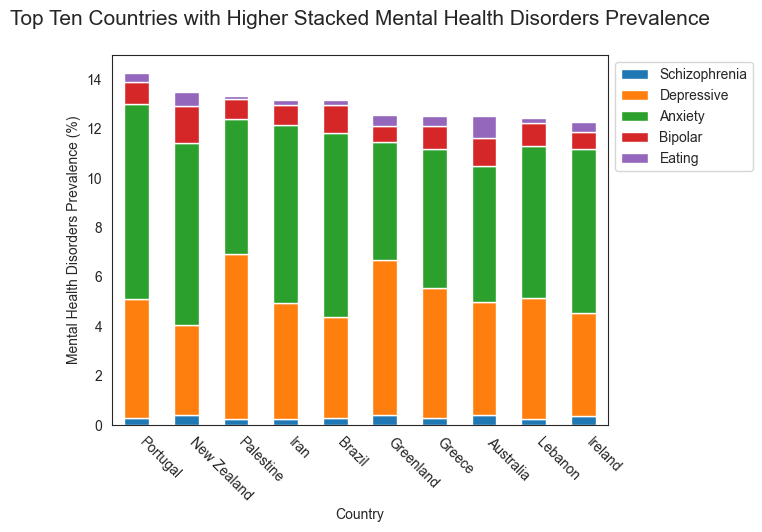

In [43]:
sns.set_style("white")
df_mh_mean=df_mh.groupby("country").mean().drop("year",axis=1)
df_mh_total=df_mh_mean.Anxiety+df_mh_mean.Bipolar+df_mh_mean.Depressive+df_mh_mean.Eating+df_mh_mean.Schizophrenia
ax=df_mh_mean.loc[list(df_mh_total.sort_values(ascending=False)[:10].index)].plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders Prevalence (%)")
plt.xlabel("Country")
plt.title(f"Top Ten Countries with Higher Stacked Mental Health Disorders Prevalence",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [44]:
pvalues=list()
fold_change=[]
paises=[]
df_mh_world_total=df_mh_world["Schizophrenia"]+df_mh_world["Depressive"]+df_mh_world["Anxiety"]+df_mh_world["Bipolar"]+df_mh_world["Eating"]
df_mh_sum=df_mh["Schizophrenia"]+df_mh["Depressive"]+df_mh["Anxiety"]+df_mh["Bipolar"]+df_mh["Eating"]
df_mh_sum.index=df_mh.country
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for pais in [list(df_mh_total.sort_values(ascending=False)[:10].index)][0]:
    df_test=df_mh_sum[df_mh_sum.index==pais]
    paises.append(pais)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test,df_mh_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100*(df_test.mean()/df_mh_world_total.mean()))
df_mh_contrast_th=pd.DataFrame({"country":paises,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_contrast_th



country  fold change percentage      p-values
0     Portugal              173.003238  8.133327e-72
1  New Zealand              163.549439  7.563103e-83
2    Palestine              161.692394  1.375917e-63
3         Iran              159.886210  1.761732e-57
4       Brazil              159.570200  1.917197e-57
5    Greenland              152.234950  2.414317e-84
6       Greece              151.907559  4.882948e-58
7    Australia              151.598603  6.997212e-51
8      Lebanon              150.874362  8.163856e-53
9      Ireland              148.606934  6.129234e-55

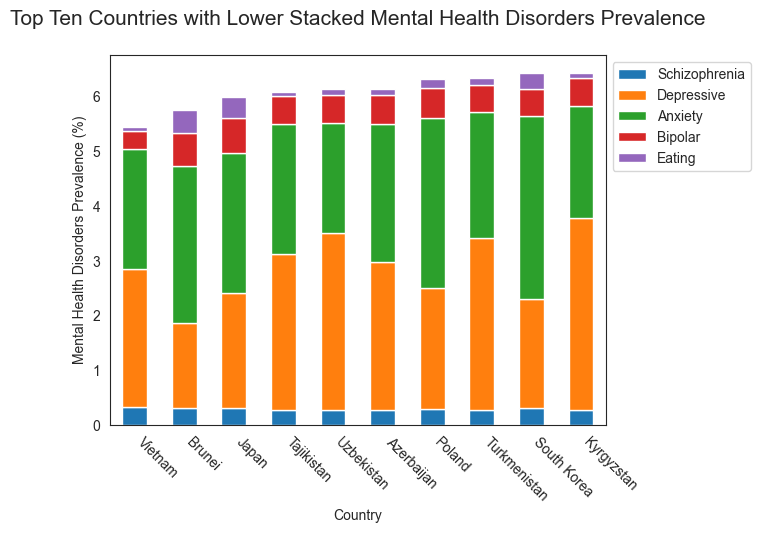

In [45]:
df_mh_total=df_mh_mean.Anxiety+df_mh_mean.Bipolar+df_mh_mean.Depressive+df_mh_mean.Eating+df_mh_mean.Schizophrenia
ax=df_mh_mean.loc[list(df_mh_total.sort_values(ascending=True)[:10].index)].plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders Prevalence (%)")
plt.xlabel("Country")
plt.title("Top Ten Countries with Lower Stacked Mental Health Disorders Prevalence",fontsize=15,y=1.06)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


In [46]:
pvalues=list()
fold_change=[]
paises=[]
df_mh_world_total=df_mh_world["Schizophrenia"]+df_mh_world["Depressive"]+df_mh_world["Anxiety"]+df_mh_world["Bipolar"]+df_mh_world["Eating"]
df_mh_sum=df_mh["Schizophrenia"]+df_mh["Depressive"]+df_mh["Anxiety"]+df_mh["Bipolar"]+df_mh["Eating"]
df_mh_sum.index=df_mh.country
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for pais in [list(df_mh_total.sort_values(ascending=True)[:10].index)][0]:
    df_test=df_mh_sum[df_mh_sum.index==pais]
    paises.append(pais)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test,df_mh_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100*(df_test.mean()/df_mh_world_total.mean()))
df_mh_contrast_th=pd.DataFrame({"country":paises,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_contrast_th



country  fold change percentage      p-values
0       Vietnam               66.121073  2.802769e-67
1        Brunei               69.949256  2.430015e-75
2         Japan               72.687132  3.886339e-57
3    Tajikistan               73.924206  3.810368e-65
4    Uzbekistan               74.439194  2.544085e-79
5    Azerbaijan               74.617679  5.940951e-66
6        Poland               76.629850  2.950812e-66
7  Turkmenistan               76.926517  3.577538e-69
8   South Korea               78.062630  5.301680e-41
9    Kyrgyzstan               78.131757  4.469377e-77

All hypothesis tests show **extremely significant differences** ($p-values < 10^{-40}$), confirming that deviations are systematic and robust, not random.
The pattern reinforces the previously observed global polarization in mental health prevalence, in which **high-income and Western nations consistently exceed global averages**, while Asian and lower-income regions fall substantially below them.

- **Highest Deviations (Fold Change ≈ 150–173%)**

Countries such as Portugal, New Zealand, Palestine, Iran, Brazil, Greenland, Greece, Australia, Lebanon, and Ireland exhibit markedly elevated prevalence—approximately 1.5–1.7× the global mean.
This group **overlaps strongly with the regions previously identified as high for anxiety and bipolar disorders**, suggesting a consistent pattern of **heightened diagnostic visibility, cultural openness, and psychosocial stress exposure in Western and upper-middle-income societies**.
The magnitude of these deviations implies not only better reporting, but potentially **higher incidence of stress-related disorders linked to modern lifestyles** and healthcare accessibility.

- **Lowest Deviations (Fold Change ≈ 66–78%)**

Conversely, Vietnam, Brunei, Japan, Tajikistan, Uzbekistan, Azerbaijan, Poland, Turkmenistan, South Korea, and Kyrgyzstan show significantly reduced prevalence—roughly 0.65–0.78× the global mean.
These results closely **mirror** earlier **trends for depression, anxiety, and bipolar disorders**, where **East and Central Asian countries** systematically **underperform global averages**.
Such patterns likely reflect a combination of **underreporting due to stigma, limited mental-health infrastructure, and diagnostic under-recognition, rather than true epidemiological scarcity**.

These findings align with prior disorder-specific analyses, confirming that **mental-health prevalence is shaped less by biology than by socioeconomic context, cultural norms, and healthcare access**.

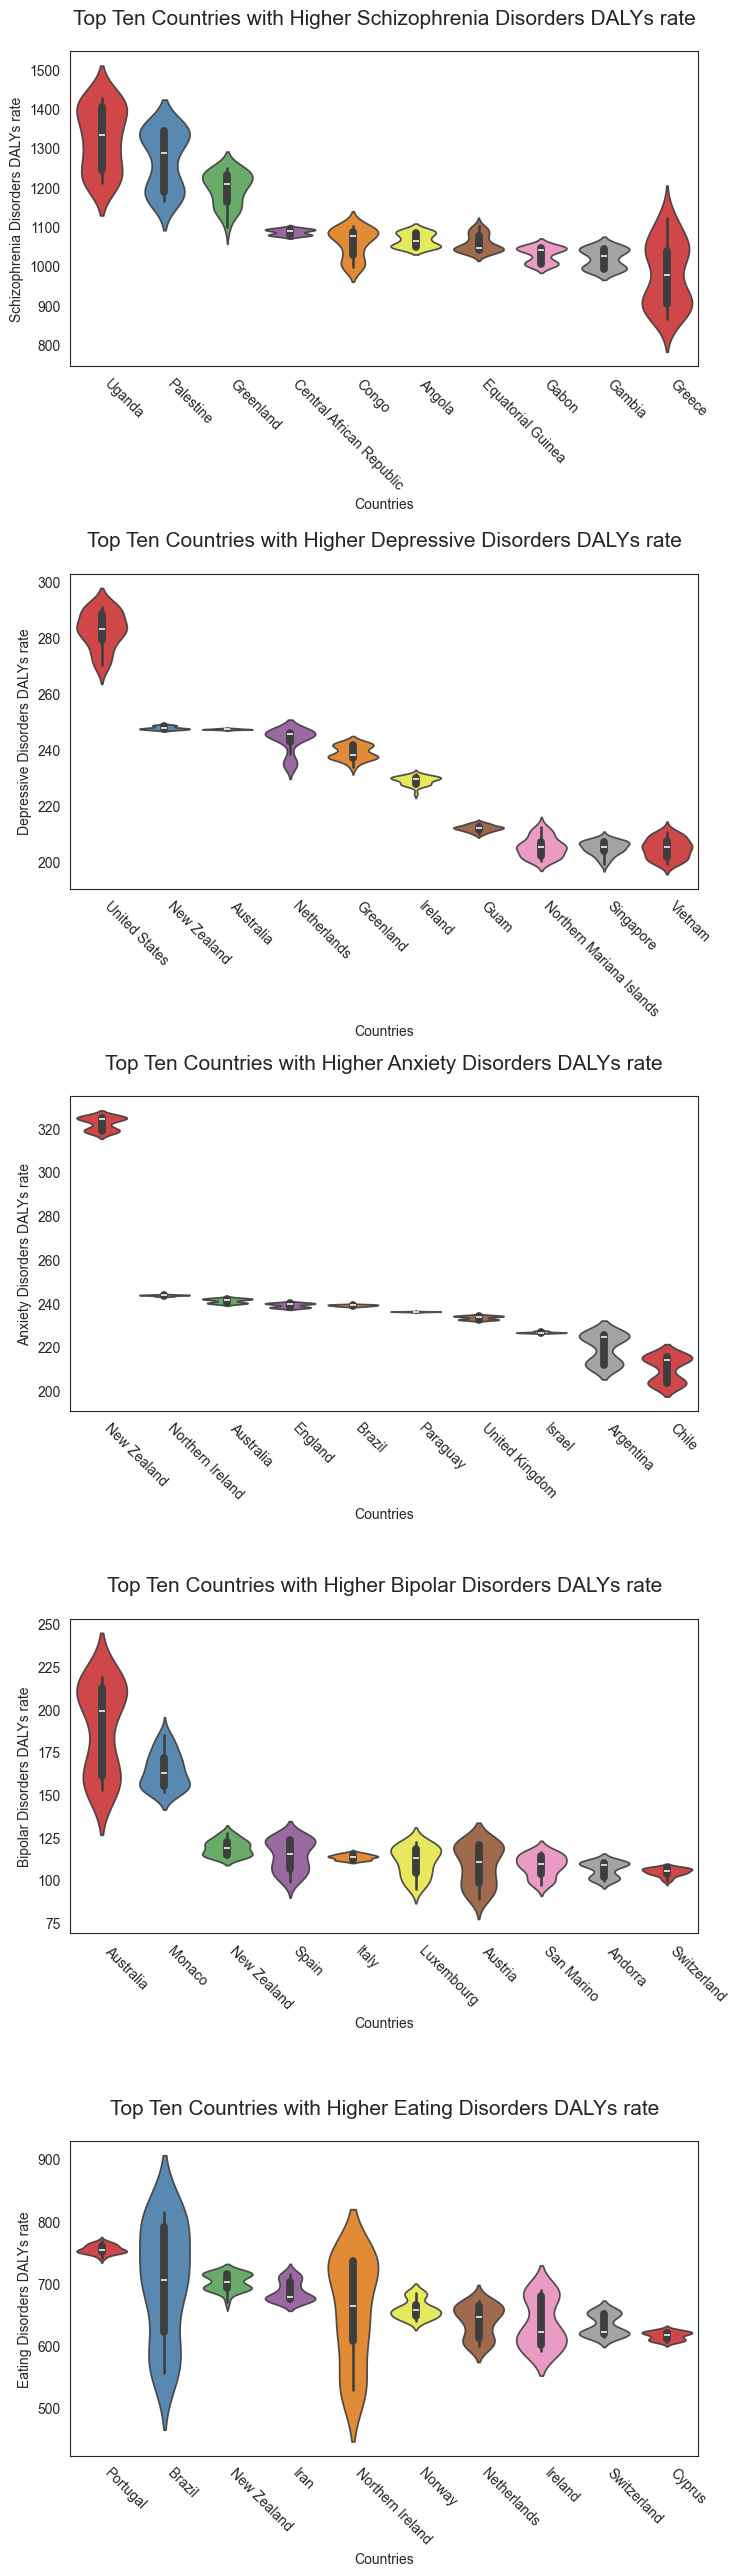

In [47]:
plt.gcf().set_size_inches(7.5,30)
for i,j in enumerate(df_mh_burden_c_y.columns):
    plt.subplot(6,1,i+1)
    sns.violinplot(data=df_mh_burden_c_y.loc[list(df_mh_burden_c_y[j].groupby("country").median().sort_values(ascending=False)[:10].index)],x="country",y=j,hue="country",palette="Set1",alpha=0.9,legend=False)
    #sns.stripplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=False)[:10].index)],x="country",y=j,color="#404040")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.xlabel("Countries")
    plt.ylabel(f"{j} Disorders DALYs rate")
    plt.title(f"Top Ten Countries with Higher {j} Disorders DALYs rate",fontsize=15,y=1.06)
plt.tight_layout()

In [48]:
pvalues=list()
fold_change=[]
disorder=[]
paises=[]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for i in df_mh_burden_c_y.columns:
    df_test=list(df_mh_burden[["country","year",i]].groupby("country").median()[i].sort_values(ascending=False).index)[:10]
    for pais in df_test:
        paises.append(pais)
        disorder.append(i)
        df_compare = pd.DataFrame({'y': np.concatenate([df_mh_burden[df_mh_burden.country==pais][i],df_mh_burden_world[i]]),'group': ['country'] * len(df_mh_burden[df_mh_burden.country==pais][i]) + ['global'] * len(df_mh_world[i]),'time':  np.tile(years, 2)})
        model = smf.quantreg('y ~ C(group) + time', data=df_compare)
        res = model.fit(q=0.5, max_iter=10000)
        pval = res.pvalues.filter(like='C(group)').iloc[0]
        pvalues.append(pval)
        fold_change.append(100 * (df_mh_burden[df_mh_burden.country==pais][i].median()/df_mh_burden_world[i].median()))
df_mh_burden_contrast_h=pd.DataFrame({"country":paises,"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_burden_contrast_h


c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum nu

country      disorders  fold change percentage  \
0                     Uganda  Schizophrenia              222.280223   
1                  Palestine  Schizophrenia              214.858799   
2                  Greenland  Schizophrenia              201.490647   
3   Central African Republic  Schizophrenia              181.787250   
4                      Congo  Schizophrenia              179.700477   
5                     Angola  Schizophrenia              177.590774   
6          Equatorial Guinea  Schizophrenia              174.362095   
7                      Gabon  Schizophrenia              173.741371   
8                     Gambia  Schizophrenia              170.957396   
9                     Greece  Schizophrenia              163.109682   
10             United States     Depressive              153.060723   
11               New Zealand     Depressive              133.842902   
12                 Australia     Depressive              133.674984   
13               Netherlands     Depressive              132.778379   
14                 Greenland     Depressive              128.647156   
15                   Ireland     Depressive              124.022372   
16                      Guam     Depressive              114.629192   
17  Northern Mariana Islands     Depressive              110.906540   
18                 Singapore     Depressive              110.876294   
19                   Vietnam     Depressive              110.835214   
20               New Zealand        Anxiety              309.033230   
21          Northern Ireland        Anxiety              232.311263   
22                 Australia        Anxiety              230.381159   
23                   England        Anxiety              228.388523   
24                    Brazil        Anxiety              227.920811   
25                  Paraguay        Anxiety              225.128811   
26            United Kingdom        Anxiety              222.933902   
27                    Israel        Anxiety              216.032667   
28                 Argentina        Anxiety              213.862223   
29                     Chile        Anxiety              204.031536   
30                 Australia        Bipolar              600.390731   
31                    Monaco        Bipolar              491.478305   
32               New Zealand        Bipolar              358.440770   
33                     Spain        Bipolar              348.123500   
34                     Italy        Bipolar              342.667341   
35                Luxembourg        Bipolar              340.571699   
36                   Austria        Bipolar              332.980128   
37                San Marino        Bipolar              329.338258   
38                   Andorra        Bipolar              327.687289   
39               Switzerland        Bipolar              317.541878   
40                  Portugal         Eating              209.375152   
41                    Brazil         Eating              195.867895   
42               New Zealand         Eating              194.928735   
43                      Iran         Eating              188.120807   
44          Northern Ireland         Eating              184.359606   
45                    Norway         Eating              182.564469   
46               Netherlands         Eating              179.418975   
47                   Ireland         Eating              172.784369   
48               Switzerland         Eating              172.527370   
49                    Cyprus         Eating              171.495512   

         p-values  
0    1.096563e-55  
1    1.414292e-53  
2    3.563454e-64  
3    3.271115e-76  
4    2.858321e-60  
5    5.072605e-80  
6    2.480480e-70  
7    1.692908e-70  
8    2.315698e-60  
9    4.400457e-23  
10  1.852732e-104  
11  1.564213e-101  
12  4.739634e-117  
13  2.072855e-103  
14   2.479728e-75  
15   1.601432e-79  
16   2.462867e-78  
17   1.776298e-53  
18   8.942997e-45  

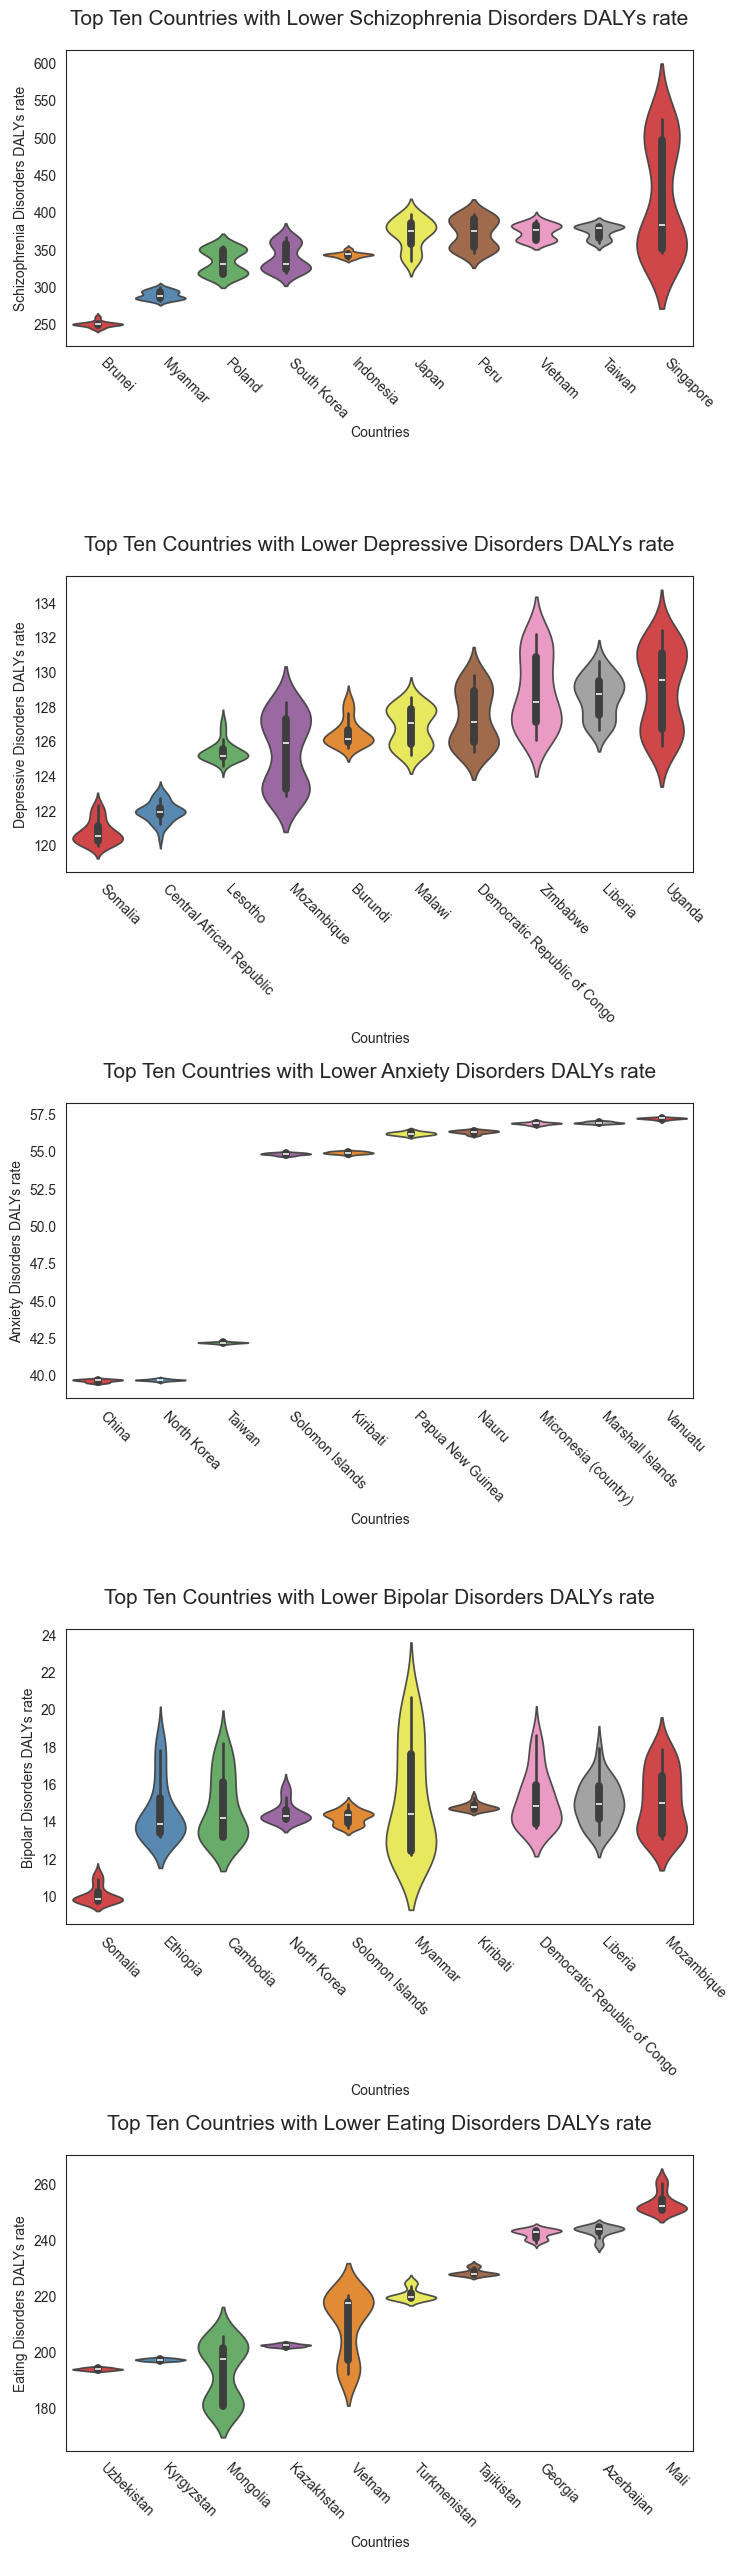

In [49]:
plt.gcf().set_size_inches(7.5,30)
for i,j in enumerate(df_mh_burden_c_y.columns):
    plt.subplot(6,1,i+1)
    sns.violinplot(data=df_mh_burden_c_y.loc[list(df_mh_burden_c_y[j].groupby("country").median().sort_values(ascending=True)[:10].index)],x="country",y=j,hue="country",palette="Set1",alpha=0.9,legend=False)
    #sns.stripplot(data=df_mh_c_y.loc[list(df_mh_c_y[j].groupby("country").median().sort_values(ascending=False)[:10].index)],x="country",y=j,color="#404040")
    plt.xticks(rotation=-45, horizontalalignment='left')
    plt.xlabel("Countries")
    plt.ylabel(f"{j} Disorders DALYs rate")
    plt.title(f"Top Ten Countries with Lower {j} Disorders DALYs rate",fontsize=15,y=1.06)
plt.tight_layout()

In [50]:
pvalues=list()
fold_change=[]
disorder=[]
paises=[]
years=df_mh_cont[df_mh_cont.country=="Africa (IHME GBD)"]["year"]
for i in df_mh_burden_c_y.columns:
    df_test=list(df_mh_burden[["country","year",i]].groupby("country").median()[i].sort_values(ascending=False).index)[:10]
    for pais in df_test:
        paises.append(pais)
        disorder.append(i)
        df_compare = pd.DataFrame({'y': np.concatenate([df_mh_burden[df_mh_burden.country==pais][i],df_mh_burden_world[i]]),'group': ['country'] * len(df_mh_burden[df_mh_burden.country==pais][i]) + ['global'] * len(df_mh_world[i]),'time':  np.tile(years, 2)})
        model = smf.quantreg('y ~ C(group) + time', data=df_compare)
        res = model.fit(q=0.5, max_iter=10000)
        pval = res.pvalues.filter(like='C(group)').iloc[0]
        pvalues.append(pval)
        fold_change.append(100 * (df_mh_burden[df_mh_burden.country==pais][i].median()/df_mh_burden_world[i].median()))
df_mh_burden_contrast_h=pd.DataFrame({"country":paises,"disorders":disorder,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_burden_contrast_h

c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum nu

country      disorders  fold change percentage  \
0                     Uganda  Schizophrenia              222.280223   
1                  Palestine  Schizophrenia              214.858799   
2                  Greenland  Schizophrenia              201.490647   
3   Central African Republic  Schizophrenia              181.787250   
4                      Congo  Schizophrenia              179.700477   
5                     Angola  Schizophrenia              177.590774   
6          Equatorial Guinea  Schizophrenia              174.362095   
7                      Gabon  Schizophrenia              173.741371   
8                     Gambia  Schizophrenia              170.957396   
9                     Greece  Schizophrenia              163.109682   
10             United States     Depressive              153.060723   
11               New Zealand     Depressive              133.842902   
12                 Australia     Depressive              133.674984   
13               Netherlands     Depressive              132.778379   
14                 Greenland     Depressive              128.647156   
15                   Ireland     Depressive              124.022372   
16                      Guam     Depressive              114.629192   
17  Northern Mariana Islands     Depressive              110.906540   
18                 Singapore     Depressive              110.876294   
19                   Vietnam     Depressive              110.835214   
20               New Zealand        Anxiety              309.033230   
21          Northern Ireland        Anxiety              232.311263   
22                 Australia        Anxiety              230.381159   
23                   England        Anxiety              228.388523   
24                    Brazil        Anxiety              227.920811   
25                  Paraguay        Anxiety              225.128811   
26            United Kingdom        Anxiety              222.933902   
27                    Israel        Anxiety              216.032667   
28                 Argentina        Anxiety              213.862223   
29                     Chile        Anxiety              204.031536   
30                 Australia        Bipolar              600.390731   
31                    Monaco        Bipolar              491.478305   
32               New Zealand        Bipolar              358.440770   
33                     Spain        Bipolar              348.123500   
34                     Italy        Bipolar              342.667341   
35                Luxembourg        Bipolar              340.571699   
36                   Austria        Bipolar              332.980128   
37                San Marino        Bipolar              329.338258   
38                   Andorra        Bipolar              327.687289   
39               Switzerland        Bipolar              317.541878   
40                  Portugal         Eating              209.375152   
41                    Brazil         Eating              195.867895   
42               New Zealand         Eating              194.928735   
43                      Iran         Eating              188.120807   
44          Northern Ireland         Eating              184.359606   
45                    Norway         Eating              182.564469   
46               Netherlands         Eating              179.418975   
47                   Ireland         Eating              172.784369   
48               Switzerland         Eating              172.527370   
49                    Cyprus         Eating              171.495512   

         p-values  
0    1.096563e-55  
1    1.414292e-53  
2    3.563454e-64  
3    3.271115e-76  
4    2.858321e-60  
5    5.072605e-80  
6    2.480480e-70  
7    1.692908e-70  
8    2.315698e-60  
9    4.400457e-23  
10  1.852732e-104  
11  1.564213e-101  
12  4.739634e-117  
13  2.072855e-103  
14   2.479728e-75  
15   1.601432e-79  
16   2.462867e-78  
17   1.776298e-53  
18   8.942997e-45  

Hypothesis tests confirm that all differences are highly significant (**p << 10⁻⁹**), indicating that these disparities are **systematic and not due to random variation**.

**Schizophrenia**
- **Highest-burden countries:** **Uganda, Palestine, Greenland, Central African Republic, Congo, Angola, Equatorial Guinea, Gabon, Gambia, Greece** (fold changes 163–222%).  
- **Lowest-burden countries:** Sub-Saharan African and several East Asian nations (fold changes ~70–80%).  
- **Interpretation:** Elevated DALY rates in certain African and conflict-affected regions reflect **high disease burden**, whereas lower rates in other low-income countries may partly result from **limited diagnostic capacity**, suggesting potential underestimation.

**Depressive Disorders**
- **Highest-burden countries:** **United States, New Zealand, Australia, Netherlands, Greenland, Ireland, Guam, Northern Mariana Islands, Singapore, Vietnam** (110–153%).  
- **Lowest-burden countries:** East Asian nations (Japan, South Korea, Myanmar) and some low-income regions (fold changes <70%).  
- **Interpretation:** Burden is elevated in high-income countries due to **higher reporting and treatment access**, whereas cultural norms and healthcare limitations may contribute to lower apparent DALYs in other regions.

**Anxiety Disorders**
- **Highest-burden countries:** **New Zealand (309%), Northern Ireland (232%), Australia (230%), England (228%), Brazil (228%), Paraguay, UK, Israel, Argentina, Chile**.  
- **Lowest-burden countries:** Central and East Asian nations, including Vietnam, Kyrgyzstan, Uzbekistan (~30–78%).  
- **Interpretation:** DALY burden for anxiety is concentrated in Western countries, likely reflecting both **lifestyle stressors and healthcare detection**, while low-burden regions may experience **underdiagnosis**.

**Bipolar Disorders**
- **Highest-burden countries:** **Australia (600%), Monaco, New Zealand, Spain, Italy, Luxembourg, Austria, San Marino, Andorra, Switzerland** (317–600%).  
- **Lowest-burden countries:** East Asian and Pacific Island nations (fold changes 37–55%).  
- **Interpretation:** High DALY rates indicate **substantial disease burden** in wealthier countries with robust diagnostic systems, whereas low values in developing regions may reflect **underrecognition and reporting gaps**.

**Eating Disorders**
- **Highest-burden countries:** **Portugal, Brazil, New Zealand, Iran, Northern Ireland, Norway, Netherlands, Ireland, Switzerland, Cyprus** (171–209%).  
- **Lowest-burden countries:** Sub-Saharan and Southeast Asian countries (fold changes 30–45%).  
- **Interpretation:** Burden is heavily concentrated in high-income contexts, driven by **cultural and lifestyle factors**, while low-burden regions may face **diagnostic gaps or different cultural drivers of disease**.

 Wealthier nations show **consistently higher DALY rates** across multiple mental health disorders. Lower-income countries often appear underrepresented, although some conflict-affected regions (e.g., certain African countries) show extreme burden. **Bipolar and anxiety disorders exhibit DALY rates up to 600% above the global mean**, illustrating concentrated disease burden **in specific countries**. The combined analysis of countries with **highest and lowest DALY rates** demonstrates that mental health burden is **shaped by socioeconomic, cultural, and healthcare factors**, not only biological risk. These results highlight the need for **globally targeted mental health strategies** that address both **underdiagnosis in low-resource regions** and **high disease burden in wealthier countries**.


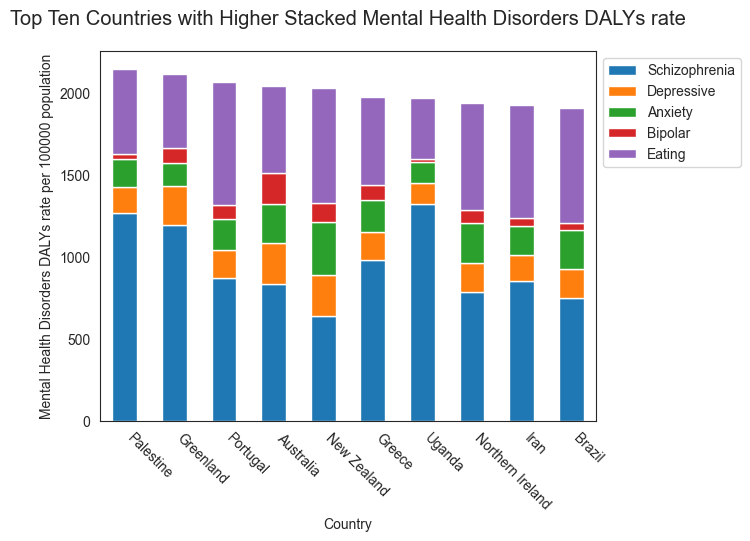

In [51]:
sns.set_style("white")
df_mh_burden_mean=df_mh_burden.groupby("country").mean().drop("year",axis=1)
df_mh_burden_total=df_mh_burden_mean.Anxiety+df_mh_burden_mean.Bipolar+df_mh_burden_mean.Depressive+df_mh_burden_mean.Eating+df_mh_burden_mean.Schizophrenia
ax=df_mh_burden_mean.loc[list(df_mh_burden_total.sort_values(ascending=False)[:10].index)].plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders DALYs rate per 100000 population")
plt.xlabel("Country")
plt.title(f"Top Ten Countries with Higher Stacked Mental Health Disorders DALYs rate",fontsize=14.5,y=1.05)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [52]:

import statsmodels.stats.descriptivestats as ssd
pvalues=list()
fold_change=[]
paises=[]
df_mh_burden_world_total=df_mh_burden_world["Schizophrenia"]+df_mh_burden_world["Depressive"]+df_mh_burden_world["Anxiety"]+df_mh_burden_world["Bipolar"]+df_mh_burden_world["Eating"]
df_mh_burden_sum=df_mh_burden["Schizophrenia"]+df_mh_burden["Depressive"]+df_mh_burden["Anxiety"]+df_mh_burden["Bipolar"]+df_mh_burden["Eating"]
df_mh_burden_sum.index=df_mh_burden.country
for pais in [list(df_mh_burden_total.sort_values(ascending=False)[:10].index)][0]:
    df_test=df_mh_burden_sum[df_mh_burden_sum.index==pais]
    paises.append(pais)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test,df_mh_burden_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_burden_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100*(df_test.mean()/df_mh_burden_world_total.mean()))
df_mh_contrast_th=pd.DataFrame({"country":paises,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_contrast_th


c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\jolup\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (10000) reached.
  warnings.warn("Maximum nu

country  fold change percentage      p-values
0         Palestine              168.034958  1.280391e-62
1         Greenland              165.687178  2.051904e-81
2          Portugal              161.808795  1.421577e-62
3         Australia              159.625901  6.823214e-51
4       New Zealand              159.032490  1.676251e-69
5            Greece              154.691407  3.522737e-55
6            Uganda              153.980299  1.503885e-55
7  Northern Ireland              151.899972  3.858930e-54
8              Iran              150.587126  1.669819e-48
9            Brazil              149.533146  3.149049e-48

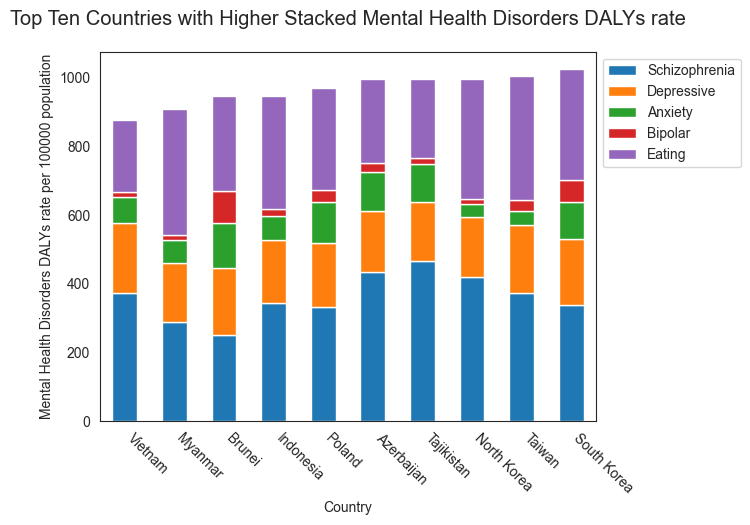

In [53]:
sns.set_style("white")
df_mh_burden_mean=df_mh_burden.groupby("country").mean().drop("year",axis=1)
df_mh_burden_total=df_mh_burden_mean.Anxiety+df_mh_burden_mean.Bipolar+df_mh_burden_mean.Depressive+df_mh_burden_mean.Eating+df_mh_burden_mean.Schizophrenia
ax=df_mh_burden_mean.loc[list(df_mh_burden_total.sort_values(ascending=True)[:10].index)].plot(kind='bar', stacked=True)
plt.xticks(rotation=-45, horizontalalignment='left')
plt.ylabel("Mental Health Disorders DALYs rate per 100000 population")
plt.xlabel("Country")
plt.title(f"Top Ten Countries with Higher Stacked Mental Health Disorders DALYs rate",fontsize=14.5,y=1.05)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [54]:
import statsmodels.stats.descriptivestats as ssd
pvalues=list()
fold_change=[]
paises=[]
df_mh_burden_world_total=df_mh_burden_world["Schizophrenia"]+df_mh_burden_world["Depressive"]+df_mh_burden_world["Anxiety"]+df_mh_burden_world["Bipolar"]+df_mh_burden_world["Eating"]
df_mh_burden_sum=df_mh_burden["Schizophrenia"]+df_mh_burden["Depressive"]+df_mh_burden["Anxiety"]+df_mh_burden["Bipolar"]+df_mh_burden["Eating"]
df_mh_burden_sum.index=df_mh_burden.country
for pais in [list(df_mh_burden_total.sort_values(ascending=True)[:10].index)][0]:
    df_test=df_mh_burden_sum[df_mh_burden_sum.index==pais]
    paises.append(pais)
    df_compare = pd.DataFrame({'y': np.concatenate([df_test,df_mh_burden_world_total]),'group': ['country'] * len(df_test) + ['global'] * len(df_mh_burden_world_total),'time':  np.tile(years, 2)})
    model = smf.quantreg('y ~ C(group) + time', data=df_compare)
    res = model.fit(q=0.5, max_iter=10000)
    pval = res.pvalues.filter(like='C(group)').iloc[0]
    pvalues.append(pval)
    fold_change.append(100*(df_test.mean()/df_mh_burden_world_total.mean()))
df_mh_contrast_th=pd.DataFrame({"country":paises,"fold change percentage":fold_change,"p-values":pvalues})
df_mh_contrast_th

country  fold change percentage      p-values
0      Vietnam               68.617719  5.197813e-62
1      Myanmar               71.144116  1.455382e-54
2       Brunei               73.928109  4.629446e-62
3    Indonesia               74.081185  9.354286e-58
4       Poland               75.750919  3.469090e-60
5   Azerbaijan               77.777080  5.701290e-52
6   Tajikistan               77.797509  1.832203e-56
7  North Korea               77.969467  5.111340e-72
8       Taiwan               78.437856  1.130131e-49
9  South Korea               80.087731  2.207444e-33

A closer examination of the **Top Ten countries with the highest and lowest stacked mental health DALYs rates** provides further insight into global mental health burden:

- **Highest-burden countries:** Palestine, Greenland, Portugal, Australia, New Zealand, Greece, Uganda, Northern Ireland, Iran, Brazil (fold change 150–168%). These nations consistently show **DALY rates well above the global average**, indicating a **substantial mental health burden** that may be associated with **high diagnostic visibility, reporting practices, and socioeconomic factors**.

- **Lowest-burden countries:** Vietnam, Myanmar, Brunei, Indonesia, Poland, Azerbaijan, Tajikistan, North Korea, Taiwan, South Korea (fold change 68–80%). These countries display **DALY rates significantly below the global mean**, which could reflect **underdiagnosis, cultural minimization, or limited healthcare infrastructure**, rather than true absence of mental health needs.

The contrast between the top and bottom countries highlights a **clear global polarization in mental health burden**. Wealthier or better-resourced countries tend to report higher DALY rates, while low- and middle-income countries often show lower measured burdens, likely masking **unmet mental health needs**.  

**In Conclusion**, these results reinforce the importance of considering **structural, cultural, and healthcare access factors** when interpreting DALYs data. Effective mental health strategies must account for **both the actual disease burden and the disparities in diagnosis and reporting**, ensuring that global interventions target regions with both **high and hidden mental health needs**.

<br></br>

### **Mental health disorders metrics correlations**

Finally in this part of the EDA we are going to analyze the prevalence and burden correlations between the different disorders. 

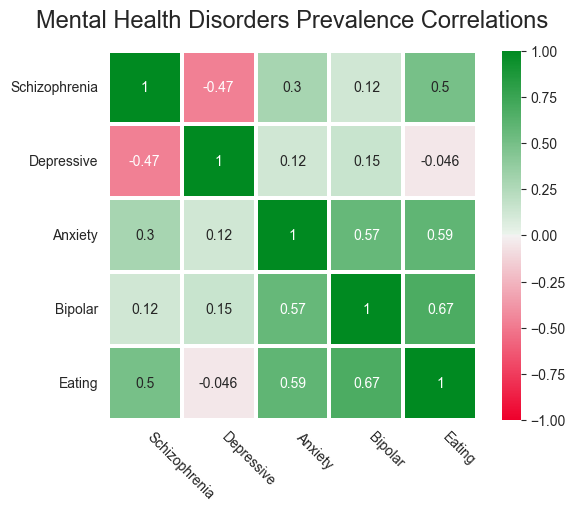

In [55]:
sns.heatmap(df_mh_c_y.corr(),cmap=sns.diverging_palette(10, 130, s=100, as_cmap=True),vmin = -1, vmax = 1,annot = True,square=True,linewidth = 1.5)
plt.title("Mental Health Disorders Prevalence Correlations",fontsize=17,y=1.04)
plt.xticks(rotation=-45, horizontalalignment='left');

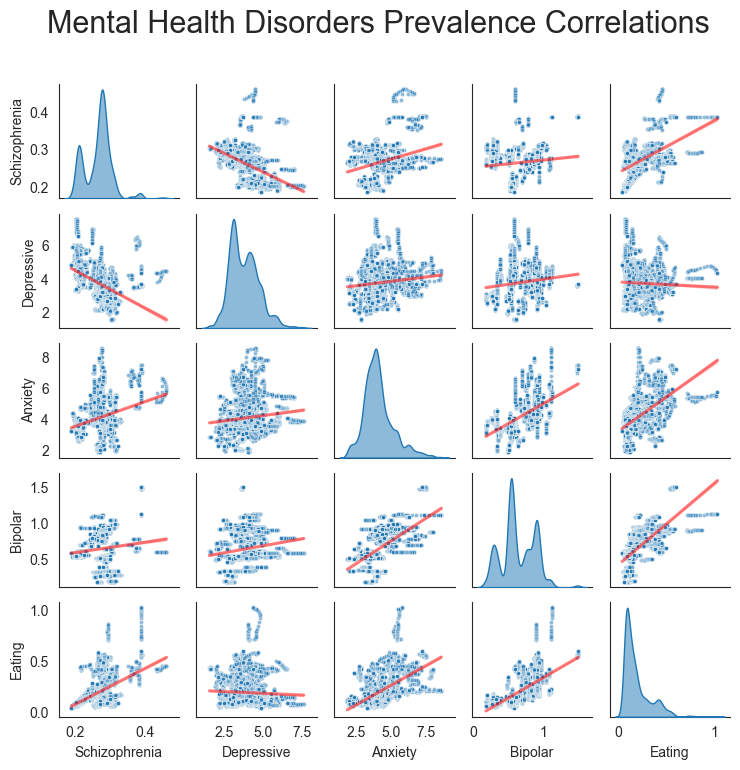

In [56]:
sns.set_style("white")
g=sns.pairplot(data=df_mh_c_y,kind="reg",diag_kind="kde",markers=".",plot_kws={"scatter_kws":{"edgecolor":"white","linewidths":0.5,"alpha":0.5},"line_kws":dict(color="r",alpha=0.5)},diag_kws={"alpha":0.5});
g.figure.suptitle("  Mental Health Disorders Prevalence Correlations", y=1.02,fontsize=22)
plt.gcf().set_size_inches(7.5,7.5)
plt.tight_layout();

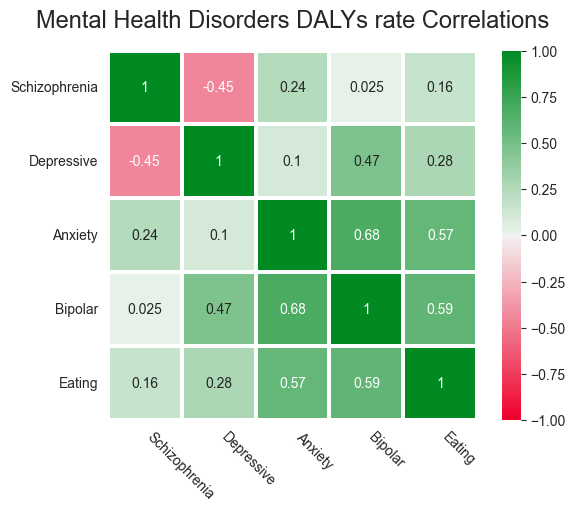

In [57]:
sns.heatmap(df_mh_burden_c_y.corr(),cmap=sns.diverging_palette(10, 130, s=100, as_cmap=True),vmin = -1, vmax = 1,annot = True,square=True,linewidth = 1.5)
plt.title("Mental Health Disorders DALYs rate Correlations",fontsize=17,y=1.04)
plt.xticks(rotation=-45, horizontalalignment='left');

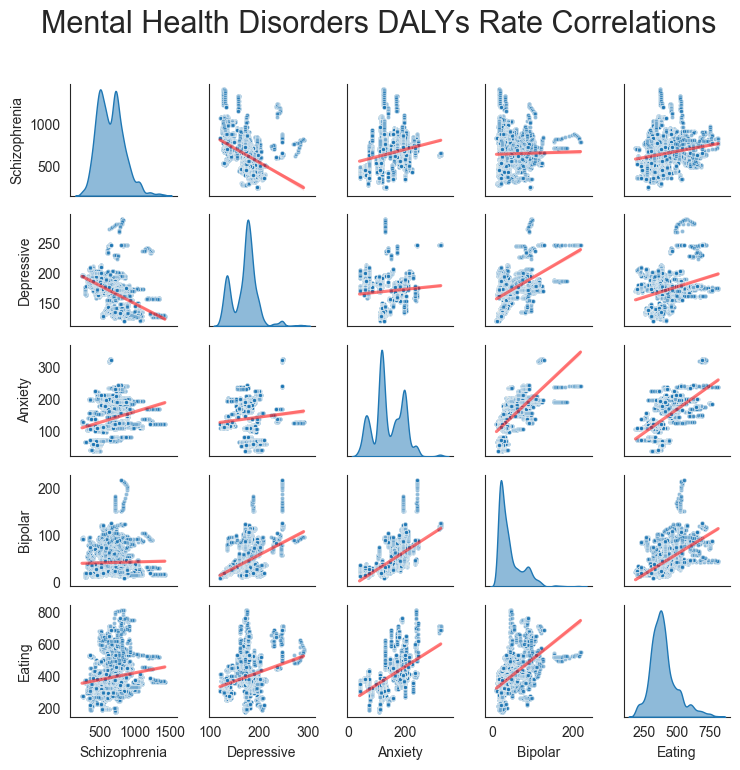

In [58]:

sns.set_style("white")
g=sns.pairplot(data=df_mh_burden_c_y,kind="reg",diag_kind="kde",markers=".",plot_kws={"scatter_kws":{"edgecolor":"white","linewidths":0.5,"alpha":0.5},"line_kws":dict(color="r",alpha=0.5)},diag_kws={"alpha":0.5});
g.figure.suptitle("  Mental Health Disorders DALYs Rate Correlations", y=1.02,fontsize=22)
plt.gcf().set_size_inches(7.5,7.5)
plt.tight_layout();

Prevalence and burden lineal correlation analysis followed the same trends:

**Strong Positive Correlations**
- **Bipolar and Eating disorders**  → Suggests these disorders often co-occur or share similar prevalence patterns.
- **Anxiety and Eating disorders**, and **Anxiety and Bipolar disorder**  → Anxiety appears to be highly comorbid with both bipolar and eating disorders.
- **Schizophrenia and Eating disorders** → Moderate relationship, possibly reflecting overlapping risk factors or diagnostic complexities.  
  
The **positive cluster** among *Anxiety, Bipolar, and Eating disorders* may indicate shared psychosocial or biological risk factors.

**Weak or Neutral Correlations**
- **Schizophrenia with Anxiety** and **Bipolar** → Indicates limited overlap in prevalence.
- **Depressive with Anxiety** and **Bipolar**  
  → These relatively low correlations may reflect distinct diagnostic boundaries or differing epidemiological patterns.

**Negative Correlations**
- **Schizophrenia and Depressive disorders (~ -0.46)**. This results could be explain because **public health systems with limited resources** tend to **focus on** either **severe disorders (like schizophrenia)** **or high-burden common disorders (like depression), but not both equally**.
In **low-resource settings** → **schizophrenia cases recorded, depression underreported**.
In high-resource settings → **depression well-tracked, schizophrenia data diluted** in broader datasets and **underdiagnosed due to stigma**.

### Conclusions on Global Mental Health Data:

The combined analyses of prevalence trends, DALYs rates, and top/bottom country comparisons reveal **complex, disorder-specific, income-sensitive, and geographically influenced patterns** in global mental health:  

**General Patterns:**  
- All five major mental health disorders show **statistically significant temporal changes** in both prevalence and DALYs rates ($p < 10^{-4}$), demonstrating that mental health challenges are **dynamic and evolving worldwide**. Countries with the **highest DALYs rates** exhibit burdens **150–168% above global averages**, while those with the lowest remain **68–80% below**, highlighting **global disparities in burden, detection, and treatment access**.

**Income-Level Associations:**  
- Except for schizophrenia, **high-income countries** consistently display **higher prevalence and greater disability burden**, indicating that mental health challenges are **more visible and impactful** in developed contexts. Low-income regions may **underreport or underdiagnose** mental disorders, masking true disability.

**Geography and Cultural Influences:**  
- **Region of the Americas and Europe** consistently show the **highest prevalence and DALY rates across most disorders**, reflecting **greater detection, lifestyle-related stressors, and years lived with disability**.  
- **Africa and South-East Asia/Asia** report **lower prevalence**, but **higher DALYs in some disorders** (e.g., schizophrenia), suggesting **underdiagnosis combined with limited treatment access**.  
- Hypothesis testing confirms these geographic differences are **highly significant** ($p < 10^{-20}$), indicating **real variation beyond random fluctuation**.  
- Cultural factors, such as **societal attitudes toward mental health, stigma, lifestyle norms, and healthcare-seeking behavior**, likely modulate both **reported prevalence and disability**.

**Disorder-Specific Insights:**  
- **Schizophrenia:** Burden is greatest in low-income countries despite uniform prevalence (~0.2–0.3%), reflecting **limited access to sustained care and medication**.  
- **Anxiety Disorders:** Highest in high-income nations (~5% prevalence, DALYs double low-income regions), linked to **stress-intensive lifestyles and complete diagnostic coverage**.  
- **Bipolar Disorder:** Stable prevalence, but DALYs rise sharply in wealthier nations (3–4× compared to low-income regions), reflecting **chronicity, long-term disability, and detection of milder cases**.  
- **Depressive Disorders:** High-income countries lead both in prevalence and DALYs (~4.5–5% prevalence, >210 per 100,000 DALYs), reinforcing depression as a **major contributor to global mental health burden**.  
- **Eating Disorders:** Concentrated in high-income nations (~0.4% prevalence, >470 DALYs per 100,000), reflecting **cultural pressures, beauty standards, and lifestyle expectations**.

**Top vs. Bottom Country Patterns:**  
- Countries with the **highest DALYs rates** (e.g., Palestine, Greenland, Australia) show **dramatically higher disease burden**, reflecting **true epidemiological differences or enhanced reporting**.  
- Countries with **lowest DALYs rates** (e.g., Vietnam, Myanmar, South Korea) have **substantially lower measured burden**, likely reflecting **underdiagnosis, healthcare limitations, or cultural barriers to detection**.

**Key Takeaways:**  
- Mental health burden **does not simply decrease with income**; high-income contexts may amplify both **prevalence and functional impact**, especially for anxiety, depression, and eating disorders.  
- Schizophrenia remains an exception: **economic disadvantage correlates with greater disability**, underscoring the **critical need for global access to psychiatric care**.  
- Geographic and cultural context shapes both **detection and disability**, highlighting the need for **locally tailored interventions** alongside universal strategies.  
- These patterns underscore the importance of **targeted, disorder-specific, income- and region-aware public health policies** to reduce the global burden of mental disorders.

**Conclusion:**  
Global mental health trends are **heterogeneous, income-sensitive, geographically influenced, and disorder-specific**, requiring **strategic, context-aware public health policies** to address both **rising burdens in high-income nations** and **treatment gaps in low-income or underdiagnosed regions**.
